# EXPLORORY DATA ANALYTICS (EDA) MACHINE LEARNING MODEL DEVELOPMENT OF NEXUS BANK

# Background

- Nexus Bank is a financial institution dedicated to delivering unparalleled banking services to her clients.
- Her mission is to establish enduring relationships with the customers by providing tailored financial solutions that align 
  with individual needs and goals.

- Nexus Bank offers a wide spectrum of banking solutions to accommodate customer lifestyle, including term deposits, personal   
  loans, and mortgage financing. Nexus team of seasoned banking professionals is committed to providing the utmost level of
  service, transparency, and honesty.

# Problem statment
- Poor term-deposit in the bank

- Nexux bank has conducted campaigns with the goal of acquiring deposits but haven't succedded.

# Aim
- To optimize its operations, mitigate risks/ loan defaults, and improve customer subscription to term deposits

# Objective

- Identify patterns and trends in customer behavior to decipher if customer demographics such as age, educational level e.t.c 
  influences customers attitude toward defaulting. 
  
- To anticipate the likelihood of subscription to term deposits from customers. 

# Data

The data used in this case study is a publicly available dataset from Kaggle, which contains information on customers registered in a bank with 45211 records and 17 variables/features.

# Methodology

- The methodology used in this case study involves the following steps:

- Data cleaning and preprocessing: The first step is to clean and preprocess the data, including handling missing values,  
  removing outliers, and transforming variables as necessary.

- Exploratory data analysis: Next, we will perform exploratory data analysis to gain insights into the data, such as identifying
  trends and patterns, and identifying correlations between variables.

- Feature engineering: Based on the insights gained from the exploratory data analysis, feature engineering was performed to 
  select the most relevant features for predicting customers who defaulted and those most likely to subscribe to term-deposit 
  and transform them as necessary.

- Encode categorical variables: Here the categorical variables are converted into numerical representations that machine 
  learning algorithms can process. Common encoding techniques used in this project is one-hot encoding.
  
- Data Spliting: The dataset was divided into training and testing sets to evaluate the model's performance on unseen data.

- Scale/Normalize numerical variables: I scaled/normalized the numerical variables in the dataset to ensure they are on a 
  similar scale. This step helps prevent features with larger magnitudes from dominating the model training process. I used the
  normalization (scaling to a specific range) technique.

- Train the model: The machine learning model was fit into the training data.

- Model selection and training: We will then select a suitable machine learning algorithm for predicting heart diseases, such as
  logistic regression, a decision tree, and other model will be trained on the preprocessed data.

- Evaluate the model: I used the testing data to assess the model's performance, such as calculating accuracy, precision, 
  recall, or other evaluation metrics.

- The best model will be selected and recmmended for use.

IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#For Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #To normalise data bet 0 and 1

#Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip instal xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

########
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#How to run several models at once! Machine Learning ALgprithm will be applied to the dataset
from sklearn.model_selection import  cross_val_score, cross_val_predict

#Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score, homogeneity_score


# DATA LOADING

In [2]:
df = pd.read_csv(r"C:\Users\oguad\Desktop\10ANALYTICS DATA SCIENCE\VIDEOS\Capstone Project\bank.csv")

In [3]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Data Dictonary

• Age: This refers to the age of the customer who holds the bank account.

• Job: This feature indicates the type of job that the customer has.

• Marital: This feature indicates the marital status of the customer, which could be "married," "divorced," or "single".

• Education: This refers to the education level of the customer, which could be "primary," "secondary," or "tertiary."

• Default: This feature indicates whether the customer has previously defaulted on a loan or credit card payment, which could
be "yes" or "no.“

• Balance: This feature represents the current balance in the customer's account.

• Housing: This feature indicates whether the customer has a housing loan or not, which could be "yes" or "no."

• Loan: This feature indicates whether the customer has a personal loan or not, which could be "yes" or "no."

• Contact: This feature indicates the method of contact used to reach out to the customer, which could be "cellular,"
"telephone," or "unknown.“

• Day: This feature represents the day of the month when the customer was last contacted.

• Month: This feature represents the month of the year when the customer was last contacted.

• Duration: This feature represents the duration of the last contact with the customer, in seconds.

• Campaign: This feature represents the number of contacts made to the customer during this campaign.

• Pdays: This feature represents the number of days that passed by after the customer was last contacted from a previous
campaign.

• Previous: This feature represents the number of contacts made to the customer before this campaign.

• Poutcome: This feature indicates the outcome of the previous marketing campaign, which could be "success," "failure," or
"unknown."

• Deposit: This feature indicates whether the customer has subscribed to a term deposit, which could be "yes" or "no."

# DATA INSPECTION AND CLEANING

In [5]:
df.shape

(45211, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


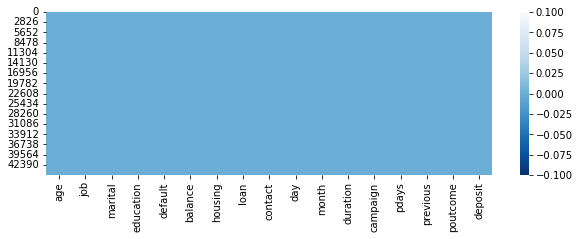

In [9]:
print(df.isnull().sum())

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

In [10]:
df[df.isnull().any(axis=1)]  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [11]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.duplicated().sum()

0

In [13]:
# Assuming you have a DataFrame named 'df' with duplicate rows

# Remove duplicates based on all columns
df = df.drop_duplicates()

# Remove duplicates and keep the first occurrence
df = df.drop_duplicates(keep='first')


In [14]:
df.duplicated().sum()

0

In [15]:
# Define a dictionary mapping month names to numerical values
month_to_num = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
}

# Convert the month column to numerical values
df['month_num'] = df['month'].map(month_to_num)

df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,month_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,5


# Exploratory Data Aalytics

In [16]:
def age_group(x):
    if x <= 19:
        return "<=25 Young"
    elif x <= 35:
        return "26-45 Young Adults"
    elif x <= 55:
        return "46-65 Old Adult"
    elif x <= 75:
        return "66-75 Elders"
    else:
        return ">=75 Aged"

df["age_group"] = df["age"].apply(age_group)


In [17]:
#Creating a function for percentage calculation and application on plots    
def perc_plot(plot, feature):
    total = len(feature)
    for p in plot.patches:
        perc = '{:.1f}%'.format(100 * p.get_height() / total)  # Fixed formatting issue here
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(perc, (x, y), ha='center')
    plt.show()

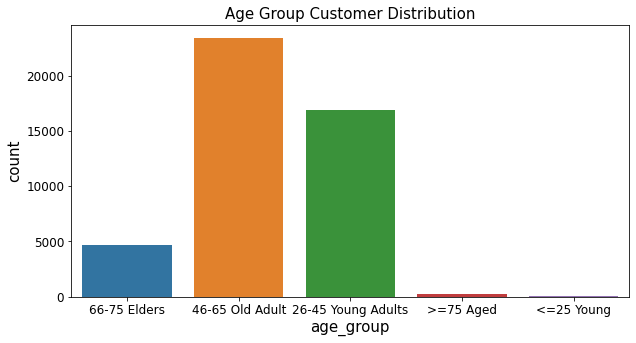

In [18]:
#Visual showing the count of category distribution
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('age_group', fontsize=15)
plt.ylabel('deposit', fontsize=15)
plt.title('Age Group Customer Distribution', fontsize=15)
ax = sns.countplot(x=df["age_group"])

plt.show()

NARRATION: From the chart, the old adult make for the largest number of customers registered in the bank while the young is the least registered.

<Figure size 1080x360 with 0 Axes>

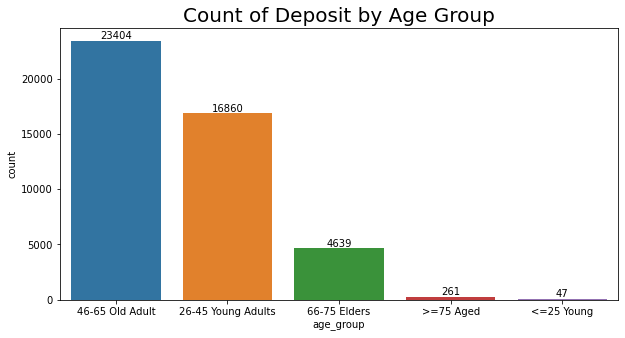

In [19]:
plt.figure(figsize=(15,5))
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = sns.countplot(x=df['age_group'], order=df['age_group'].value_counts(ascending=False).index)
values = df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);
plt.title('Count of Deposit by Age Group', fontsize=20)

plt.show();

NARRATION: The old adult also make up for the age group with the highest deposit in the bank.

<Figure size 1080x360 with 0 Axes>

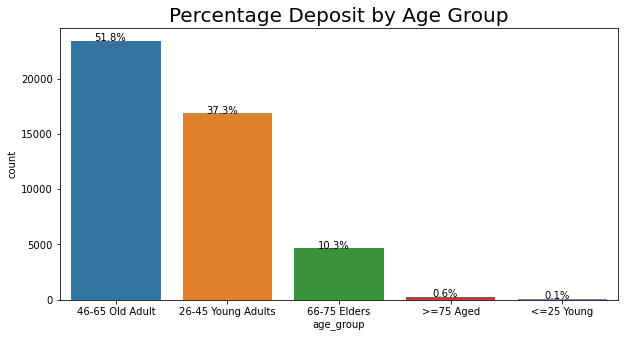

In [20]:
plt.figure(figsize=(15,5))
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = sns.countplot(x=df['age_group'], order=df['age_group'].value_counts(ascending=False).index)
plt.title('Percentage Deposit by Age Group', fontsize=20)
perc_plot(ax, df["age_group"])

plt.show();

NARRATION: The old adult make up for over half of the entire deposit made in the bank with 51.8% value.

In [21]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,month_num,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,5,66-75 Elders


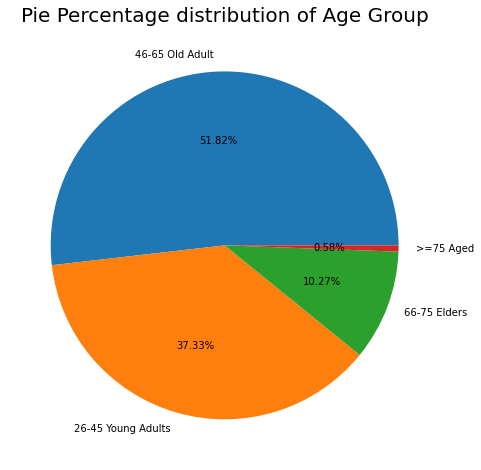

In [22]:
fig,ax=plt.subplots(figsize=(10,8))
best_ag= df["age_group"].value_counts().head(4)
ax.pie(best_ag, labels=best_ag.index, autopct=lambda p:f'{p:.2f}%')
plt.title('Pie Percentage distribution of Age Group', fontsize=20)

plt.show()


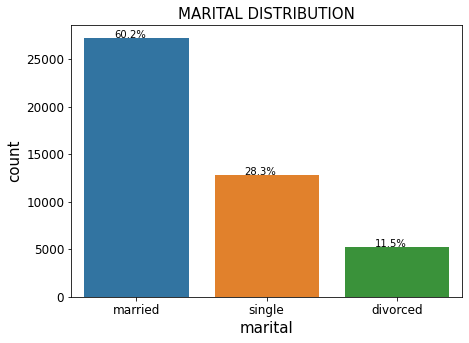

In [23]:
plt.figure(figsize=(7, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('marital', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('MARITAL DISTRIBUTION', fontsize=15)
ax = sns.countplot(x=df["marital"])
perc_plot(ax, df["marital"])

plt.show()

NARRATION: The married are the largest customers in the bank by 60.2%. Followed by the single with 28.3% and the divorced as the least

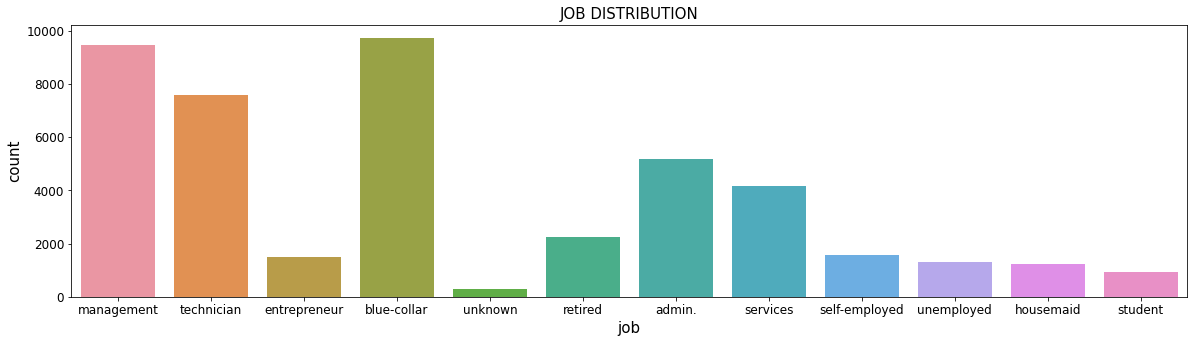

In [24]:
plt.figure(figsize=(20, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('job', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('JOB DISTRIBUTION', fontsize=15)
ax = sns.countplot(x=df["job"])

plt.show()

NARRATION: The blue-collar, management and technicians make up the highest job categories as customers of the NeXUS bank.

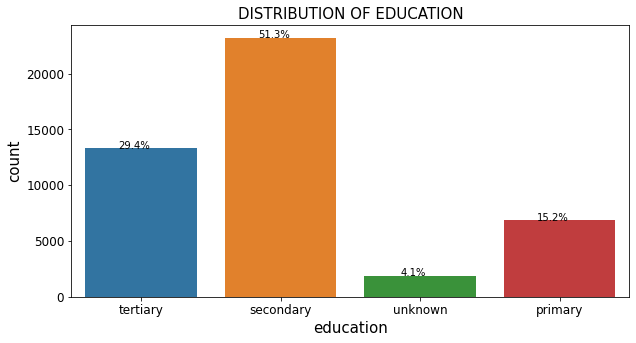

In [25]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('education', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('DISTRIBUTION OF EDUCATION', fontsize=15)
ax = sns.countplot(x=df["education"])
perc_plot(ax, df["education"])

plt.show()

NARRATION: Those with secondary academic qualification status account for the banks largest customers.

<Figure size 2880x504 with 0 Axes>

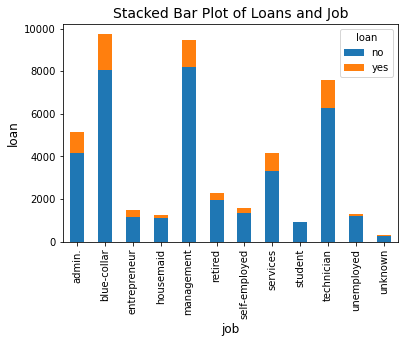

In [26]:
plt.figure(figsize=(40, 7))
cross_tab = pd.crosstab(df['job'], df['loan'])
cross_tab.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('job', fontsize=12)
plt.ylabel('loan', fontsize=12)
plt.title('Stacked Bar Plot of Loans and Job', fontsize=14)

# Display the plot
plt.show();

NARRATION: From the stacked plot above, the blue-collar, management and technicians took the most loan with students as the least.


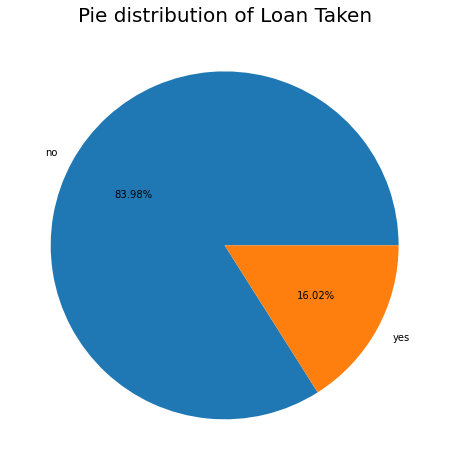

In [27]:
fig,ax=plt.subplots(figsize=(10,8))
best_ag= df["loan"].value_counts().head(4)
ax.pie(best_ag, labels=best_ag.index, autopct=lambda p:f'{p:.2f}%')
plt.title('Pie distribution of Loan Taken', fontsize=20)

plt.show()

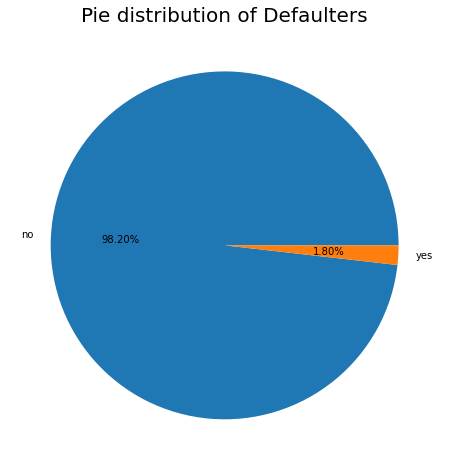

In [28]:
fig,ax=plt.subplots(figsize=(10,8))
best_ag= df["default"].value_counts().head(4)
ax.pie(best_ag, labels=best_ag.index, autopct=lambda p:f'{p:.2f}%')
plt.title('Pie distribution of Defaulters', fontsize=20)

plt.show()

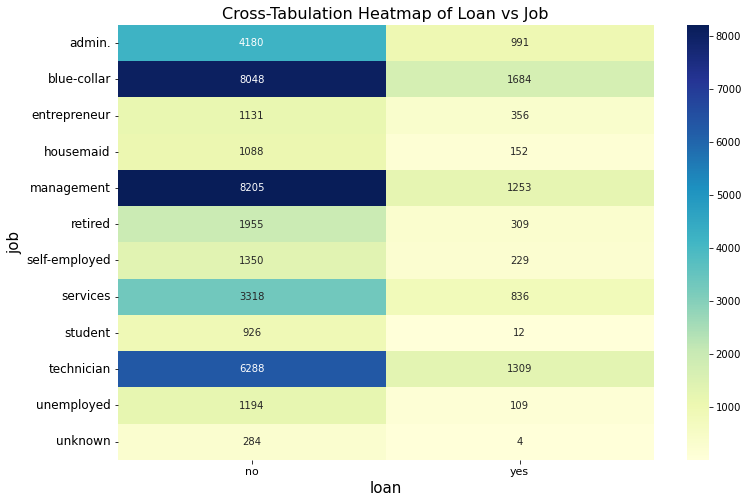

In [29]:
#To understand the relationship between loan and job
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['job'], df['loan'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel('loan', fontsize=15)
plt.ylabel('job', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Loan vs Job', fontsize=16)

# Display the plot
plt.show()

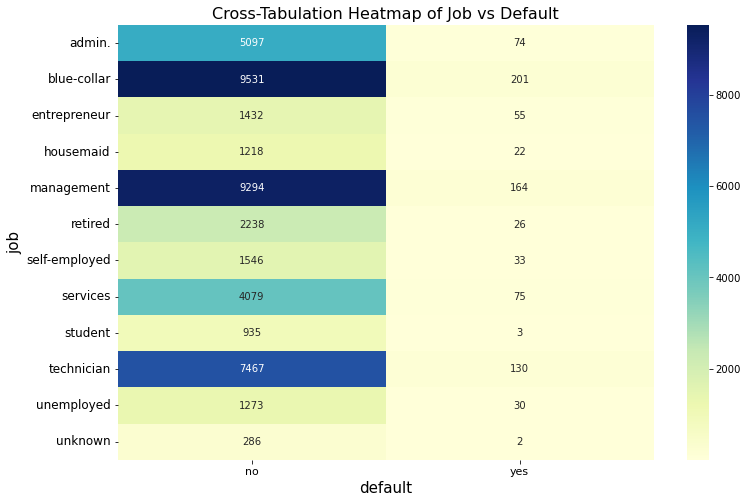

In [30]:
#To understand the relationship between job and defaulters
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['job'], df['default'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel('default', fontsize=15)
plt.ylabel('job', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Job vs Default', fontsize=16)

# Display the plot
plt.show()

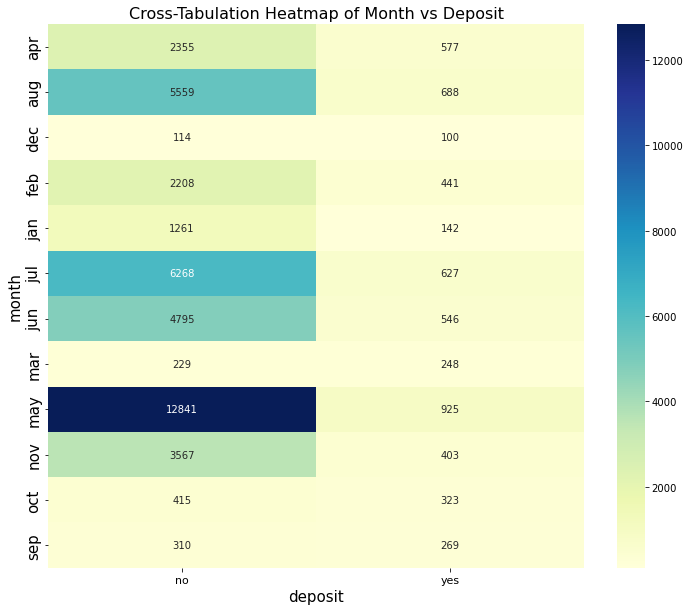

In [31]:
#To understand the relationship between month and deposit
plt.figure(figsize=(12,10))
cross_tab = pd.crosstab(df['month'], df['deposit'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('deposit', fontsize=15)
plt.ylabel('month', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Month vs Deposit', fontsize=16)

# Display the plot
plt.show()

In [32]:
# Convert "yes" and "no" to numerical variables
df['deposits'] = df['deposit'].map({'no': 0, 'yes': 1})
df['loans'] = df['loan'].map({'no': 0, 'yes': 1})
df['defaults'] = df['default'].map({'no': 0, 'yes': 1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,month_num,age_group,deposits,loans,defaults
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,5,66-75 Elders,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,5,46-65 Old Adult,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,5,26-45 Young Adults,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,5,46-65 Old Adult,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,5,26-45 Young Adults,0,0,0


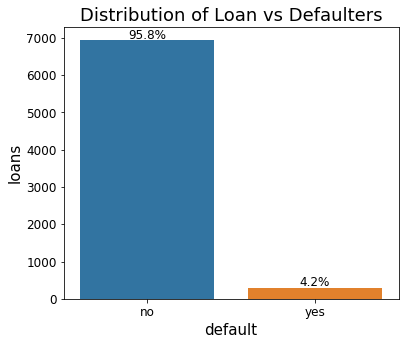

In [33]:
plt.figure(figsize=(6,5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('default', fontsize = 15)
plt.ylabel('loans',  fontsize = 15)
plt.title('Distribution of Loan vs Defaulters', fontsize = 18)
full_rev = df.groupby("default")["loans"].sum().reset_index()
ax=sns.barplot(x="default", data=full_rev, y='loans')
 
revenue_percentage = full_rev["loans"] / full_rev["loans"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{revenue_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

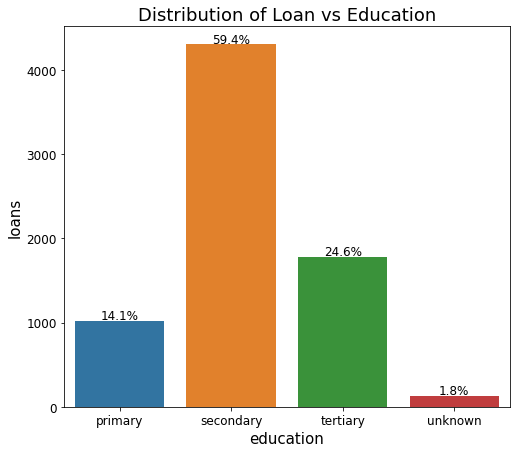

In [34]:
plt.figure(figsize=(8,7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('education', fontsize = 15)
plt.ylabel('loans',  fontsize = 15)
plt.title('Distribution of Loan vs Education', fontsize = 18)
full_rev = df.groupby("education")["loans"].sum().reset_index()
ax=sns.barplot(x="education", data=full_rev, y='loans')

revenue_percentage = full_rev["loans"] / full_rev["loans"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{revenue_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

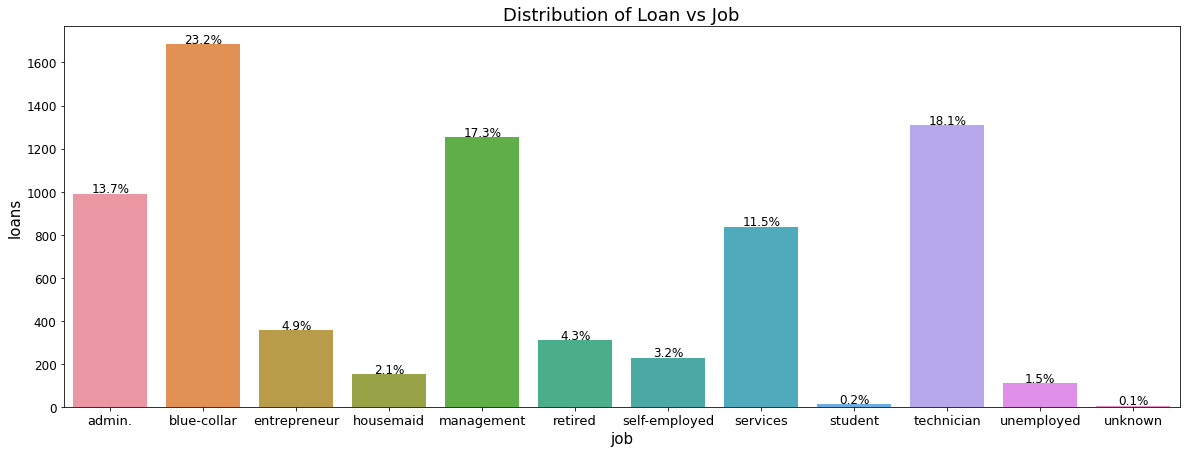

In [35]:
plt.figure(figsize=(20,7))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 12)
plt.xlabel('job', fontsize = 15)
plt.ylabel('loans',  fontsize = 15)
plt.title('Distribution of Loan vs Job', fontsize = 18)
loan_job = df.groupby("job")["loans"].sum().reset_index()
ax=sns.barplot(x="job", data=loan_job, y='loans')

loan_percentage = loan_job["loans"] / loan_job["loans"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{loan_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

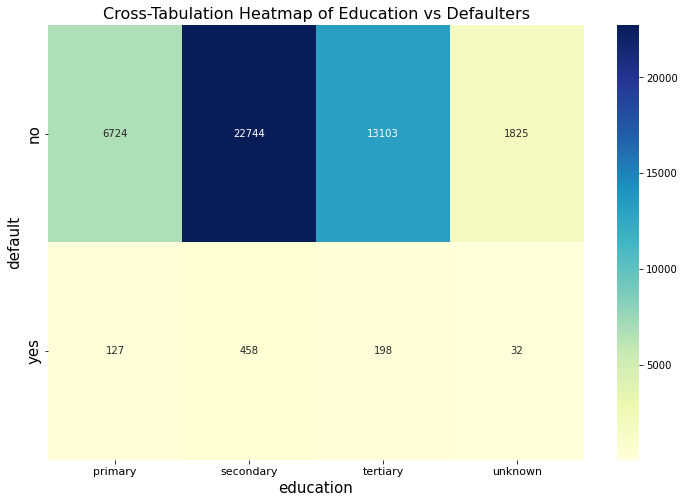

In [36]:
#To understand the relationship between education and defaulters
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['default'], df['education'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('education', fontsize=15)
plt.ylabel('default', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Education vs Defaulters', fontsize=16)

# Display the plot
plt.show()

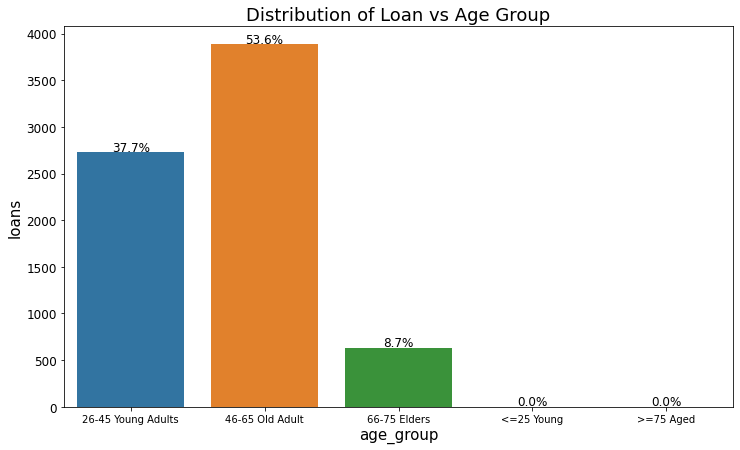

In [37]:
#To understand the relationship between age groups and loan
plt.figure(figsize=(12,7))
plt.yticks(fontsize = 12)
plt.xlabel('age_group', fontsize = 15)
plt.ylabel('loans',  fontsize = 15)
plt.title('Distribution of Loan vs Age Group', fontsize = 18)
full_rev = df.groupby("age_group")["loans"].sum().reset_index()
ax=sns.barplot(x="age_group", data=full_rev, y='loans')

# Percentage of quantity ordered 
revenue_percentage = full_rev["loans"] / full_rev["loans"].sum() * 100

# Add quantity ordered percentage line
for i, p in enumerate(ax.patches):
    ax.annotate(f'{revenue_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

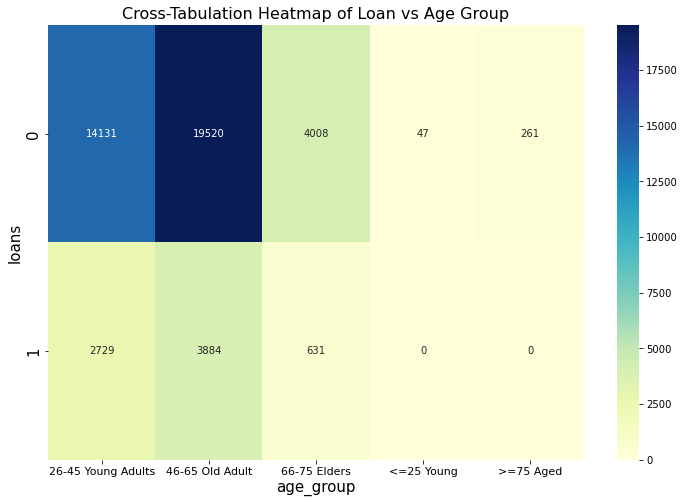

In [38]:
#To understand the relationship between age groups and defaulters
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['loans'], df['age_group'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('age_group', fontsize=15)
plt.ylabel('loans', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Loan vs Age Group', fontsize=16)

# Display the plot
plt.show()

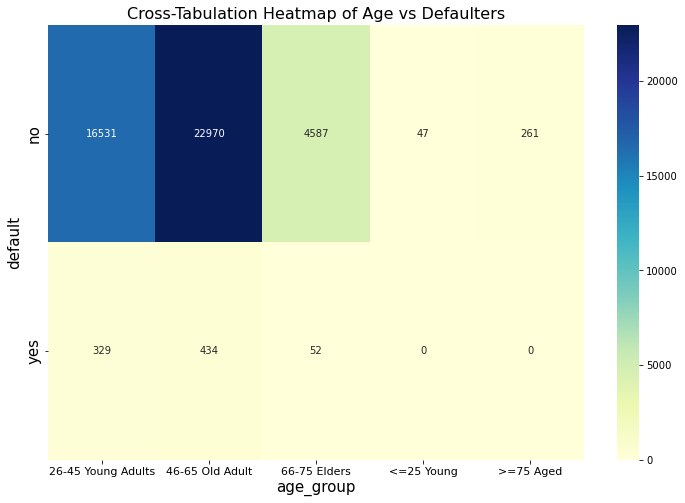

In [39]:
#To understand the relationship between age groups and defaulters
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['default'], df['age_group'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('age_group', fontsize=15)
plt.ylabel('default', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Age vs Defaulters', fontsize=16)

# Display the plot
plt.show()

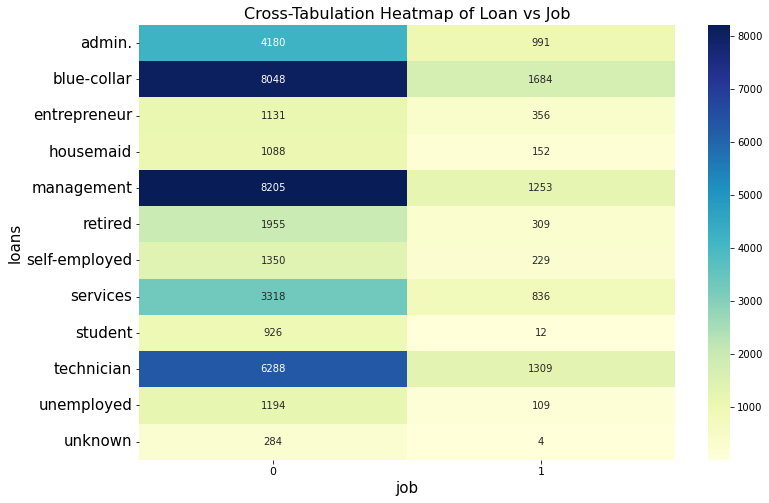

In [40]:
#To understand the relationship between loan and job
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['job'], df['loans'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('job', fontsize=15)
plt.ylabel('loans', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Loan vs Job', fontsize=16)

# Display the plot
plt.show()

In [41]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,month_num,age_group,deposits,loans,defaults
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,5,66-75 Elders,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,5,46-65 Old Adult,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,5,26-45 Young Adults,0,1,0


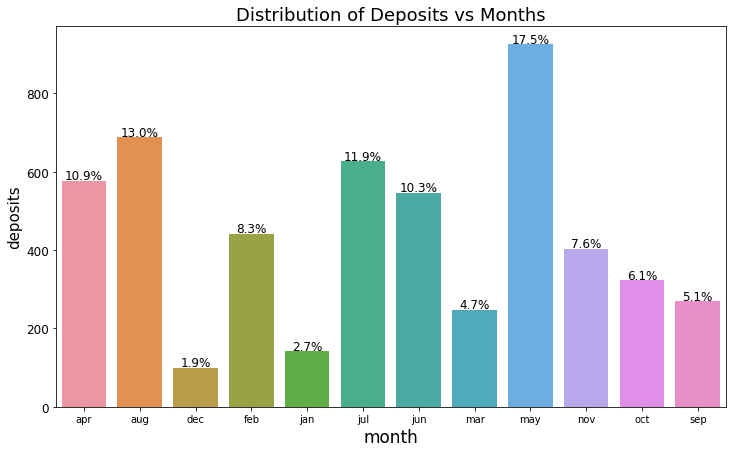

In [42]:
plt.figure(figsize=(12,7))
plt.yticks(fontsize = 12)
plt.xlabel('month', fontsize = 17)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Distribution of Deposits vs Months', fontsize = 18)
month_dep = df.groupby("month")["deposits"].sum().reset_index()
ax=sns.barplot(x="month", data=month_dep, y='deposits')

# Percentage of quantity ordered 
deposits_percentage = month_dep["deposits"] / month_dep["deposits"].sum() * 100

# Add quantity ordered percentage line
for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

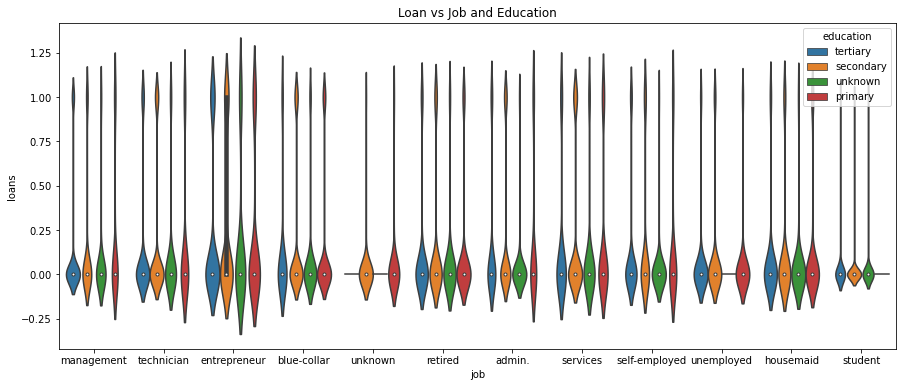

In [43]:
# Violin plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='job', y='loans', data=df, hue='education')
plt.xlabel('job')
plt.ylabel('loans')
plt.title('Loan vs Job and Education')
plt.show()



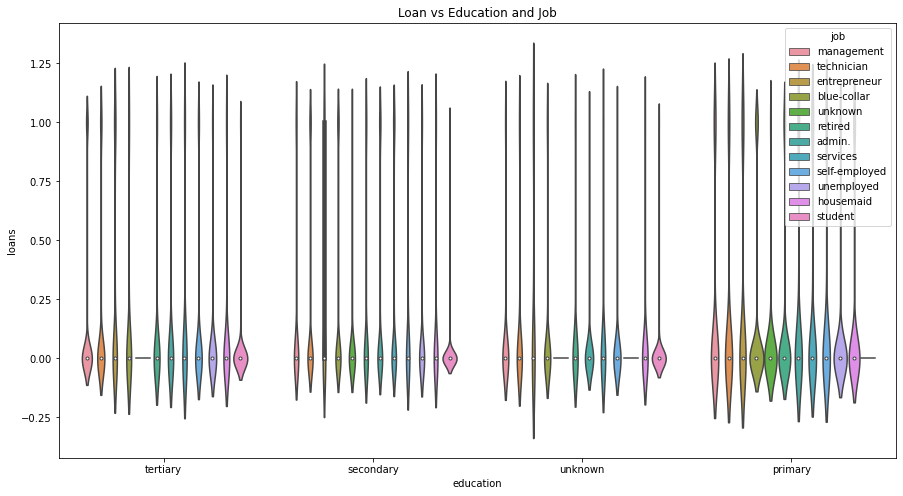

In [44]:
# Violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(x='education', y='loans', data=df, hue='job')
plt.xlabel('education')
plt.ylabel('loans')
plt.title('Loan vs Education and Job')
plt.show()


# Multivariate Analysis

In [45]:
#Compare category, education, loans, defaults and deposits

edu = df.groupby("education")[["loans", "defaults", "deposits"]].sum().reset_index()
edu

#Lets visualise-In order to do this, we transpose education, loans, defaults and deposits columns into a single column (metriec)
edu1 = pd.melt(edu, id_vars="education", var_name="Metric", value_name="Total")
edu1

,education,Metric,Total
0,primary,loans,1024
1,secondary,loans,4303
2,tertiary,loans,1784
3,unknown,loans,133
4,primary,defaults,127
5,secondary,defaults,458
6,tertiary,defaults,198
7,unknown,defaults,32
8,primary,deposits,591
9,secondary,deposits,2450


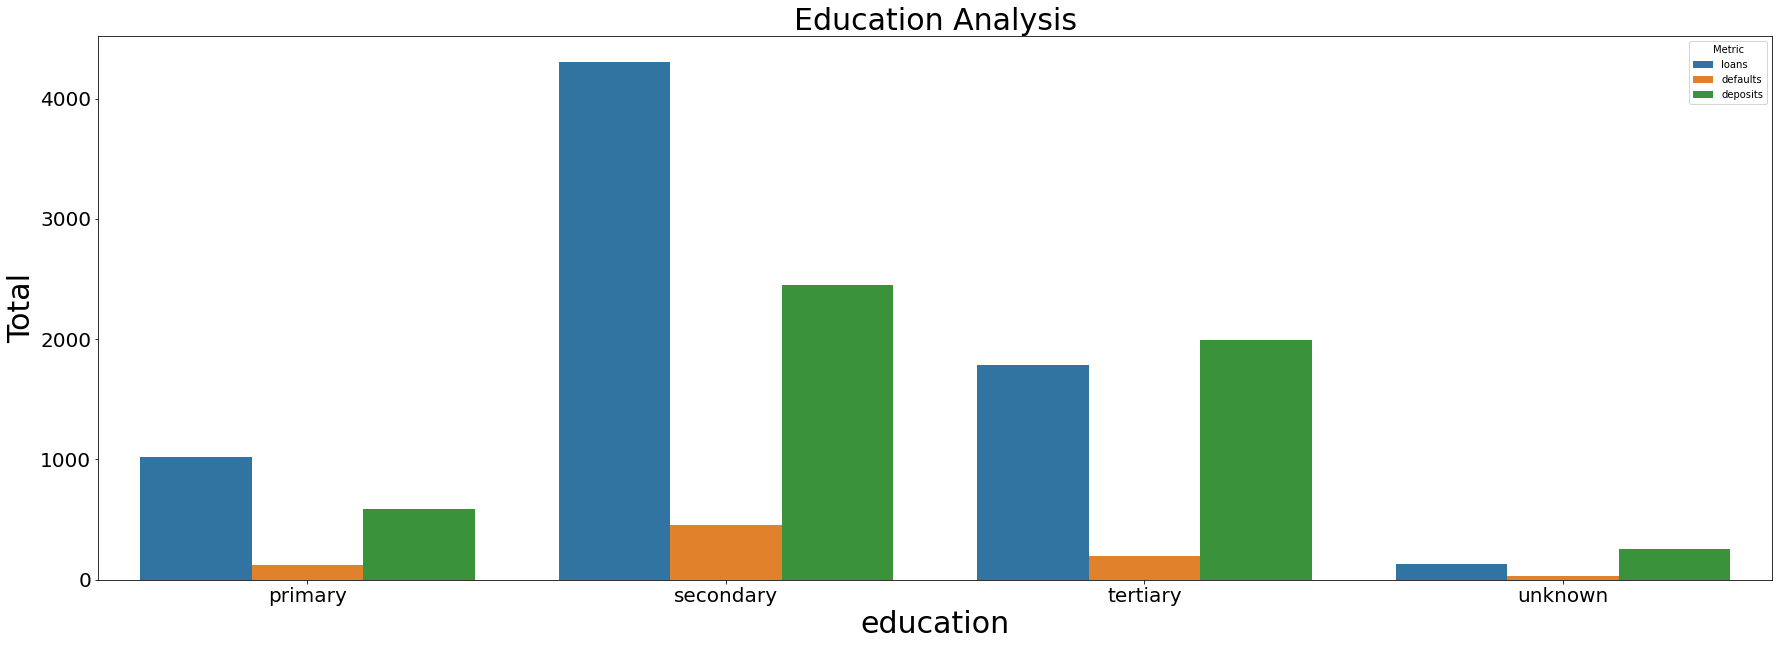

In [46]:
#Lets visualise-In order to do this
plt.figure(figsize=(30,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('education', fontsize=30)
plt.ylabel('Total',  fontsize=30)
plt.title('Education Analysis', fontsize=30)
edu1 = pd.melt(edu, id_vars="education", var_name="Metric", value_name="Total")
sns.barplot(x="education", y="Total", data=edu1, hue="Metric")

plt.show();

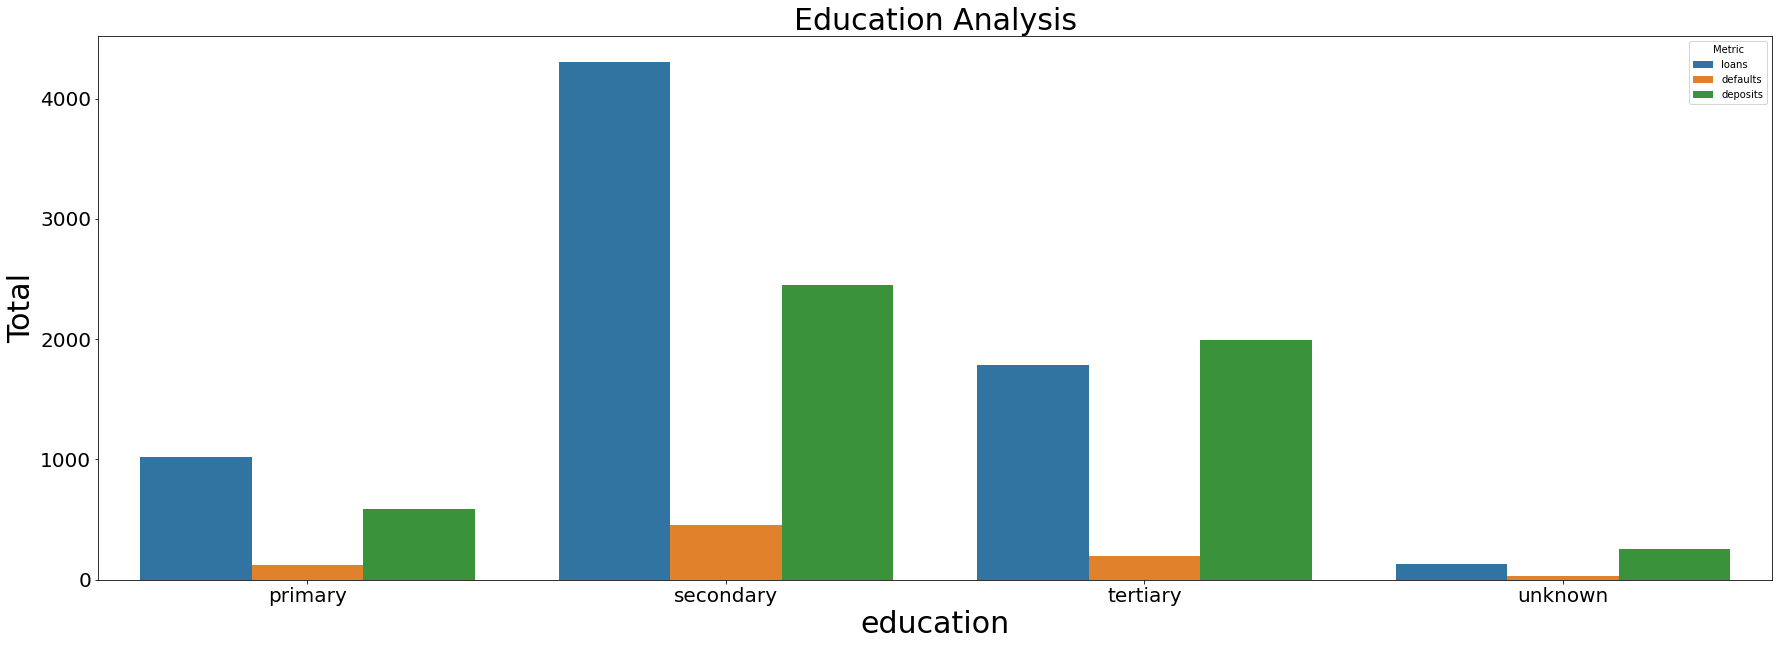

In [47]:
# Create the bar plot
plt.figure(figsize=(30, 10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('education', fontsize=30)
plt.ylabel('Total', fontsize=30)
plt.title('Education Analysis', fontsize=30)
edu1 = pd.melt(edu, id_vars="education", var_name="Metric", value_name="Total")
ax = sns.barplot(x="education", y="Total", data=edu1, hue="Metric")

plt.show()


In [48]:
#Compare category, job, loans, defaults and deposits

jb = df.groupby("job")[["loans", "defaults", "deposits"]].sum().reset_index()
jb

#Lets visualise-In order to do this, we transpose job, loans, defaults and deposits columns into a single column (metriec)
jb1 = pd.melt(jb, id_vars="job", var_name="Metric", value_name="Total")
jb1

,job,Metric,Total
0,admin.,loans,991
1,blue-collar,loans,1684
2,entrepreneur,loans,356
3,housemaid,loans,152
4,management,loans,1253
5,retired,loans,309
6,self-employed,loans,229
7,services,loans,836
8,student,loans,12
9,technician,loans,1309


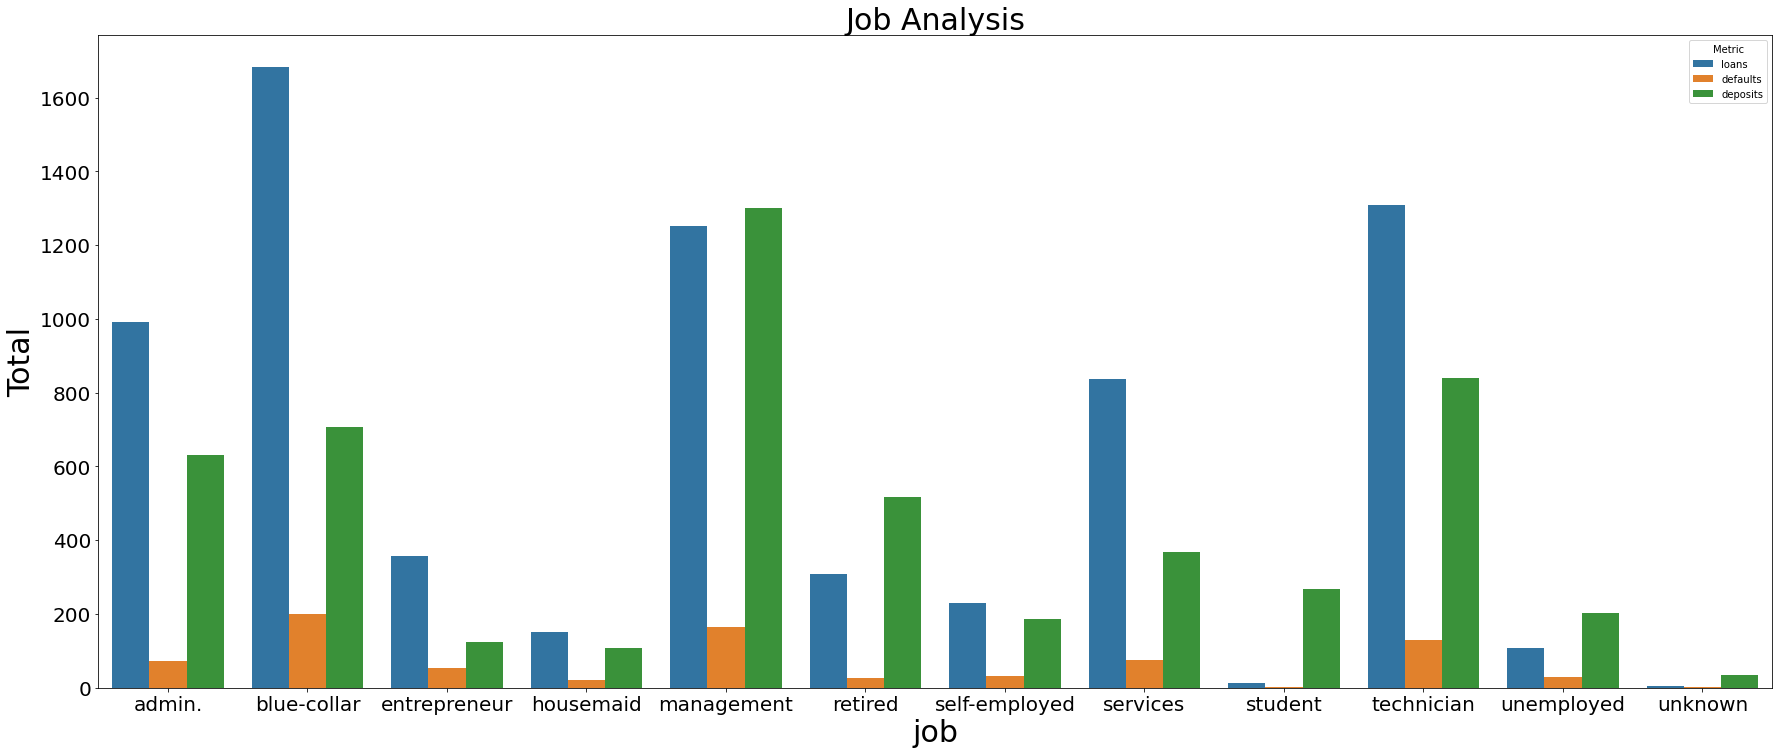

In [49]:
#Lets visualise-In order to do this
plt.figure(figsize=(30,12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('job', fontsize=30)
plt.ylabel('Total',  fontsize=30)
plt.title('Job Analysis', fontsize=30)
edu1 = pd.melt(jb, id_vars="job", var_name="Metric", value_name="Total")
sns.barplot(x="job", y="Total", data=jb1, hue="Metric")

plt.show();

In [50]:
#Compare category, job, loans, defaults and deposits

jb = df.groupby("job")[["loans", "defaults", "deposits"]].sum().reset_index()
jb

#Lets visualise-In order to do this, we transpose job, loans, defaults and deposits columns into a single column (metriec)
jb1 = pd.melt(jb, id_vars="job", var_name="Metric", value_name="Total")
jb1

,job,Metric,Total
0,admin.,loans,991
1,blue-collar,loans,1684
2,entrepreneur,loans,356
3,housemaid,loans,152
4,management,loans,1253
5,retired,loans,309
6,self-employed,loans,229
7,services,loans,836
8,student,loans,12
9,technician,loans,1309


In [51]:
#Compare category, age_group, loans, defaults and deposit

age_gp = df.groupby("age_group")[["loans", "defaults", "deposits"]].sum().reset_index()
age_gp

#Lets visualise-In order to do this, we transpose age_group, loans, defaults and deposit columns into a single column (metriec)
age_gp1 = pd.melt(age_gp, id_vars="age_group", var_name="Metric", value_name="Total")
age_gp1

,age_group,Metric,Total
0,26-45 Young Adults,loans,2729
1,46-65 Old Adult,loans,3884
2,66-75 Elders,loans,631
3,<=25 Young,loans,0
4,>=75 Aged,loans,0
5,26-45 Young Adults,defaults,329
6,46-65 Old Adult,defaults,434
7,66-75 Elders,defaults,52
8,<=25 Young,defaults,0
9,>=75 Aged,defaults,0


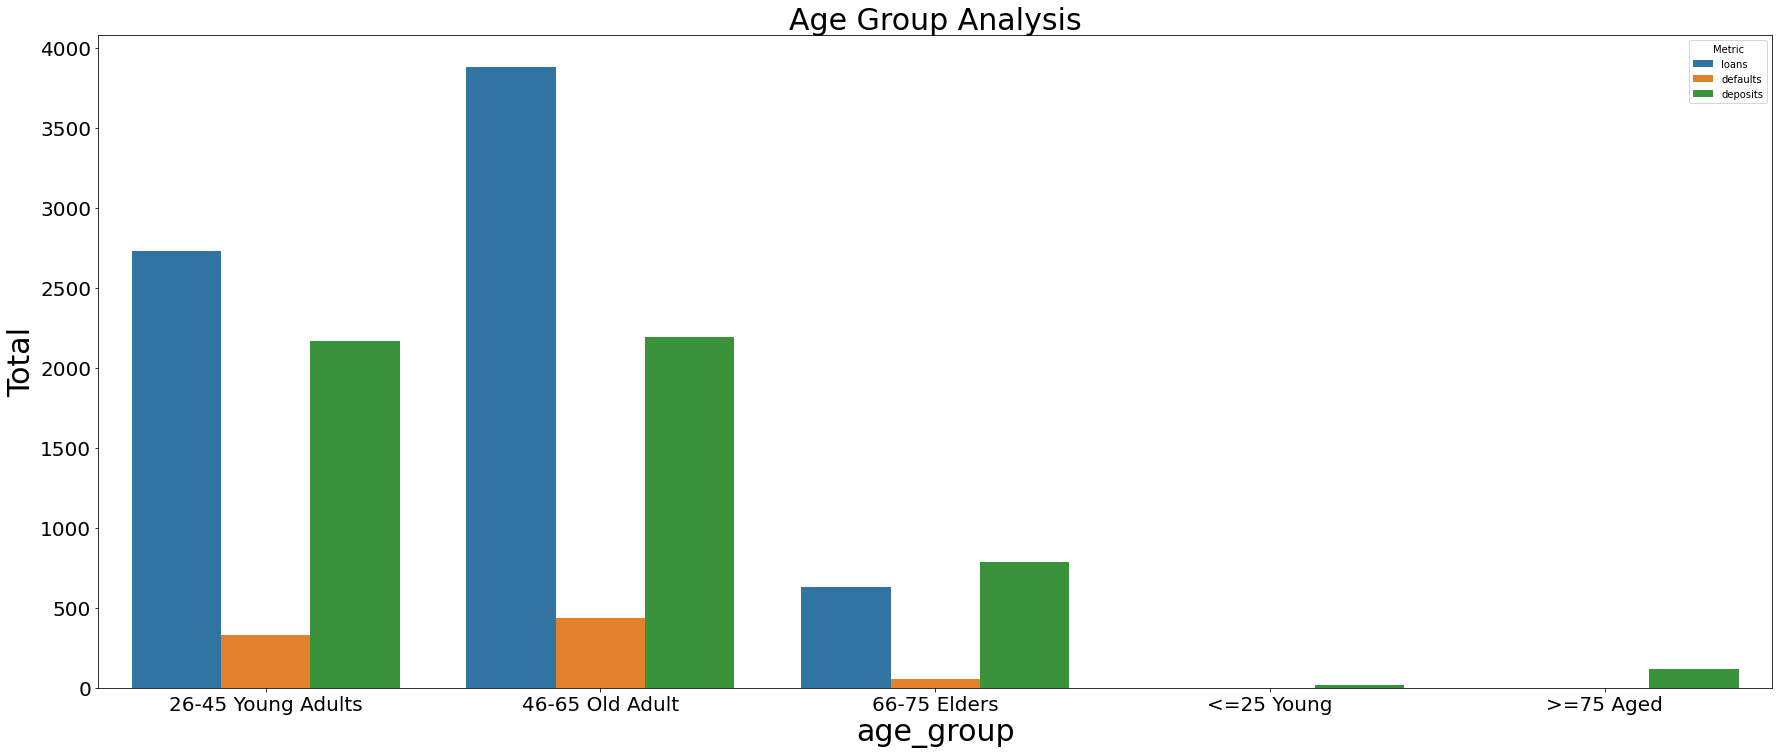

In [52]:
#Lets visualise-In order to do this
plt.figure(figsize=(30,12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('age_group', fontsize=30)
plt.ylabel('Total',  fontsize=30)
plt.title('Age Group Analysis', fontsize=30)
age_gp1 = pd.melt(age_gp, id_vars="age_group", var_name="Metric", value_name="Total")
sns.barplot(x="age_group", y="Total", data=age_gp1, hue="Metric")

plt.show();

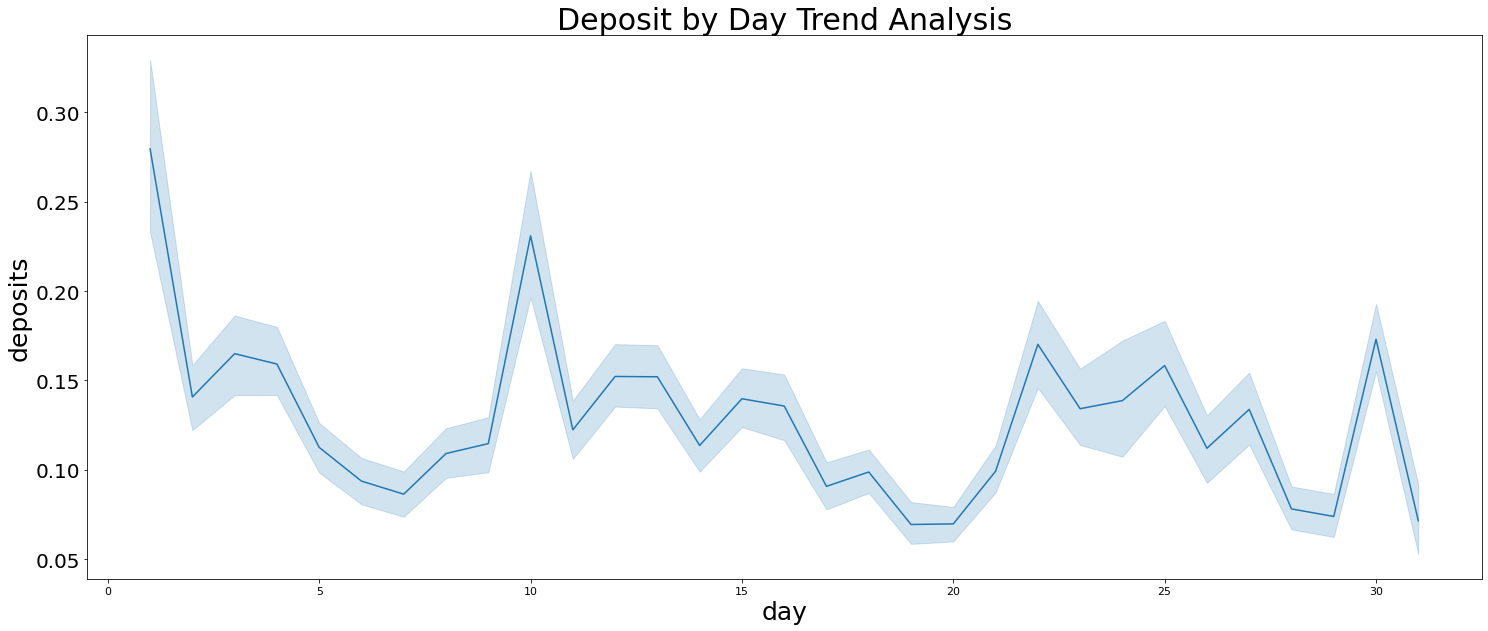

In [53]:
#Compare Revenue and 3 variable to unerstand trends
plt.figure(figsize=(25,10))
plt.xticks(fontsize=11)
plt.yticks(fontsize=20)
plt.xlabel('day', fontsize=25)
plt.ylabel('deposits',  fontsize=25)
sns.lineplot(x="day", y="deposits", data=df)
plt.title('Deposit by Day Trend Analysis', fontsize=30);


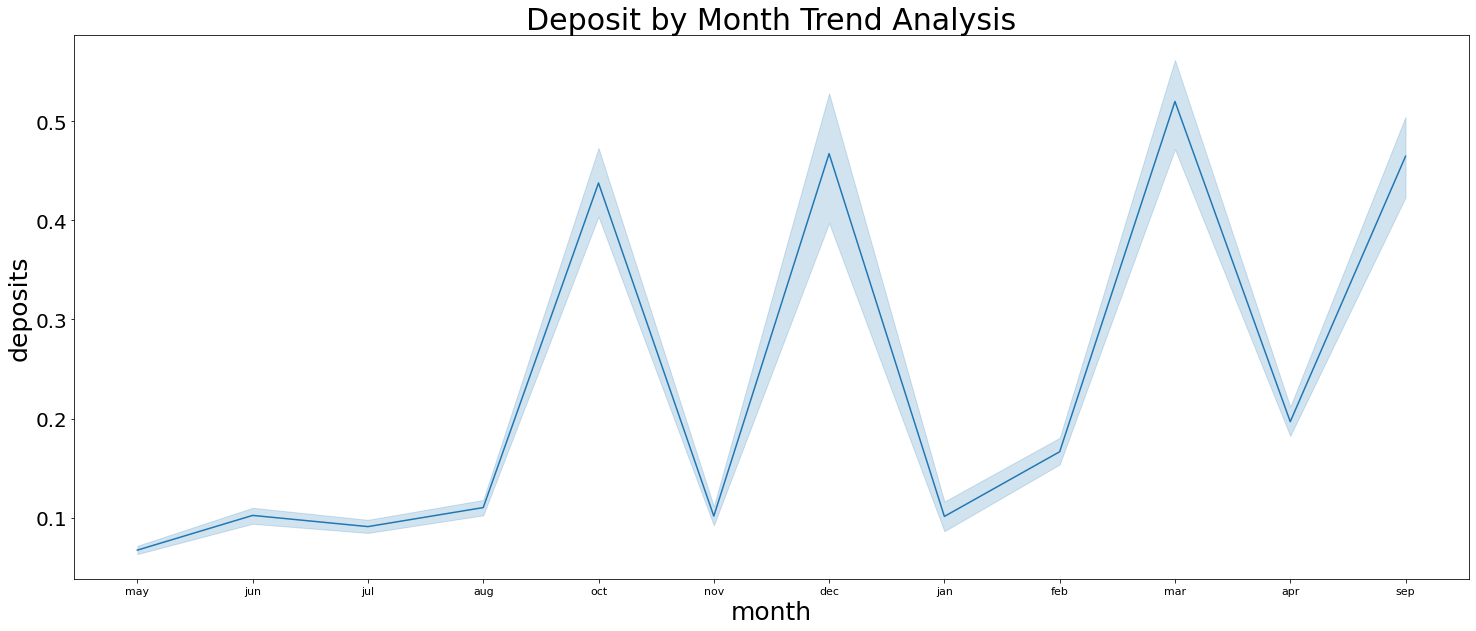

In [54]:
#Compare deposit and month
plt.figure(figsize=(25,10))
plt.xticks(fontsize=11)
plt.yticks(fontsize=20)
plt.xlabel('month', fontsize=25)
plt.ylabel('deposits', fontsize=25)
sns.lineplot(x="month", y="deposits", data=df)
plt.title('Deposit by Month Trend Analysis', fontsize=30);


In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'month_num', 'age_group', 'deposits',
       'loans', 'defaults'],
      dtype='object')

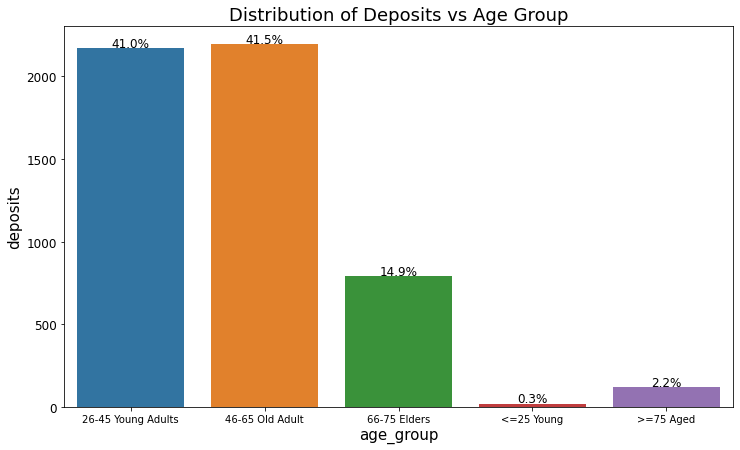

In [56]:
plt.figure(figsize=(12,7))
plt.yticks(fontsize = 12)
plt.xlabel('age_group', fontsize = 15)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Distribution of Deposits vs Age Group', fontsize = 18)
full_dep = df.groupby("age_group")["deposits"].sum().reset_index()
ax=sns.barplot(x="age_group", data=full_dep, y='deposits')

deposits_percentage = full_dep["deposits"] / full_dep["deposits"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

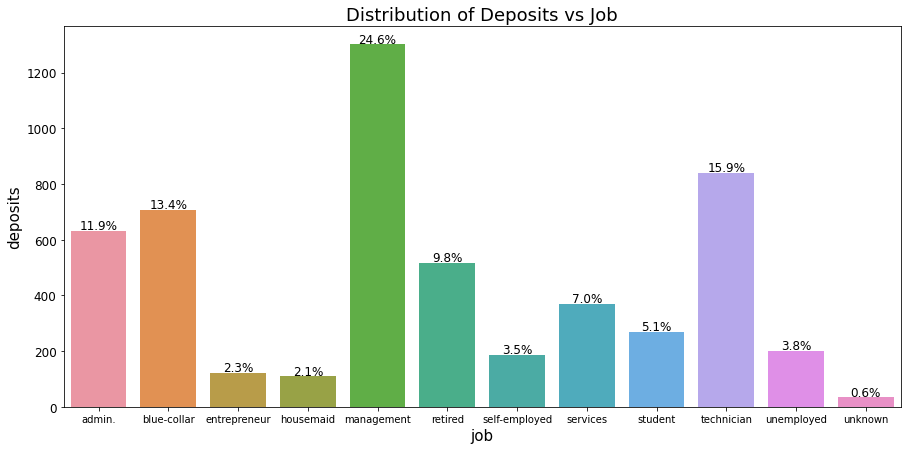

In [57]:
plt.figure(figsize=(15,7))
plt.yticks(fontsize = 12)
plt.xlabel('job', fontsize = 15)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Distribution of Deposits vs Job', fontsize = 18)
full_dep = df.groupby("job")["deposits"].sum().reset_index()
ax=sns.barplot(x="job", data=full_dep, y='deposits')

deposits_percentage = full_dep["deposits"] / full_dep["deposits"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

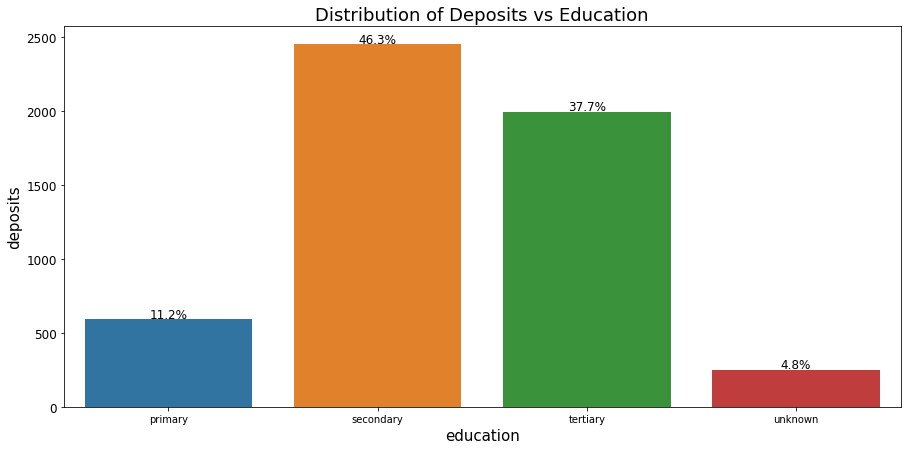

In [58]:
plt.figure(figsize=(15,7))
plt.yticks(fontsize = 12)
plt.xlabel('education', fontsize = 15)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Distribution of Deposits vs Education', fontsize = 18)
edu_dep = df.groupby("education")["deposits"].sum().reset_index()
ax=sns.barplot(x="education", data=edu_dep, y='deposits')

deposits_percentage = edu_dep["deposits"] / edu_dep["deposits"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

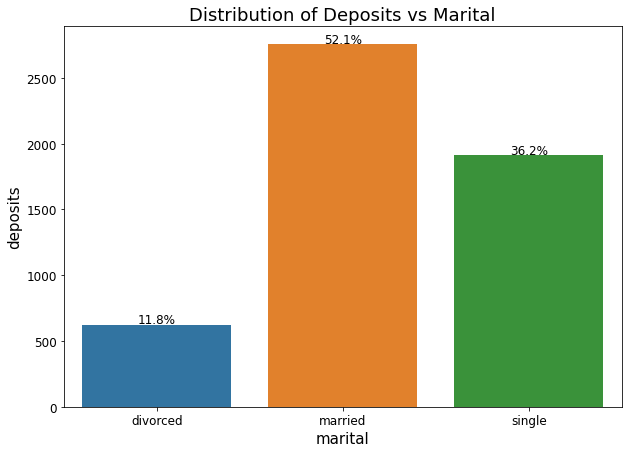

In [59]:
plt.figure(figsize=(10,7))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('marital', fontsize = 15)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Distribution of Deposits vs Marital', fontsize = 18)
mar_dep = df.groupby("marital")["deposits"].sum().reset_index()
ax=sns.barplot(x="marital", data=mar_dep, y='deposits')

deposits_percentage = mar_dep["deposits"] / mar_dep["deposits"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

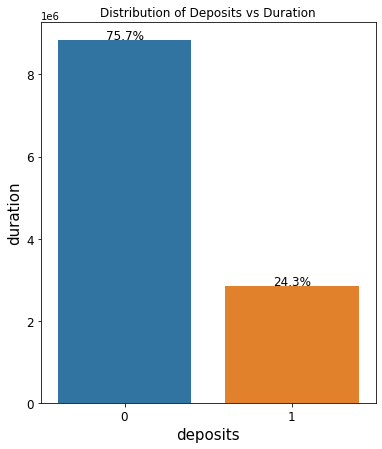

In [60]:
plt.figure(figsize=(6,7))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('deposits', fontsize = 15)
plt.ylabel('duration',  fontsize = 15)
plt.title('Distribution of Deposits vs Duration', fontsize = 12)
dura_dep = df.groupby("deposits")["duration"].sum().reset_index()
ax=sns.barplot(x="deposits", data=dura_dep, y='duration')

deposits_percentage = dura_dep["duration"] / dura_dep["duration"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{deposits_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

# QUESTION 2

In [61]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,month_num,age_group,deposits,loans,defaults
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,5,66-75 Elders,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,5,46-65 Old Adult,0,0,0


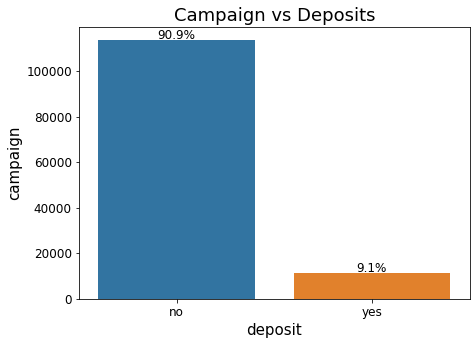

In [62]:
plt.figure(figsize=(7,5))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('deposit', fontsize = 15)
plt.ylabel('campaign',  fontsize = 15)
plt.title('Campaign vs Deposits', fontsize = 18)
camp_dep = df.groupby("deposit")["campaign"].sum().reset_index()
ax=sns.barplot(x="deposit", data=camp_dep, y='campaign')

campaign_percentage = camp_dep["campaign"] / camp_dep["campaign"].sum() * 100

for i, p in enumerate(ax.patches):
    ax.annotate(f'{campaign_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

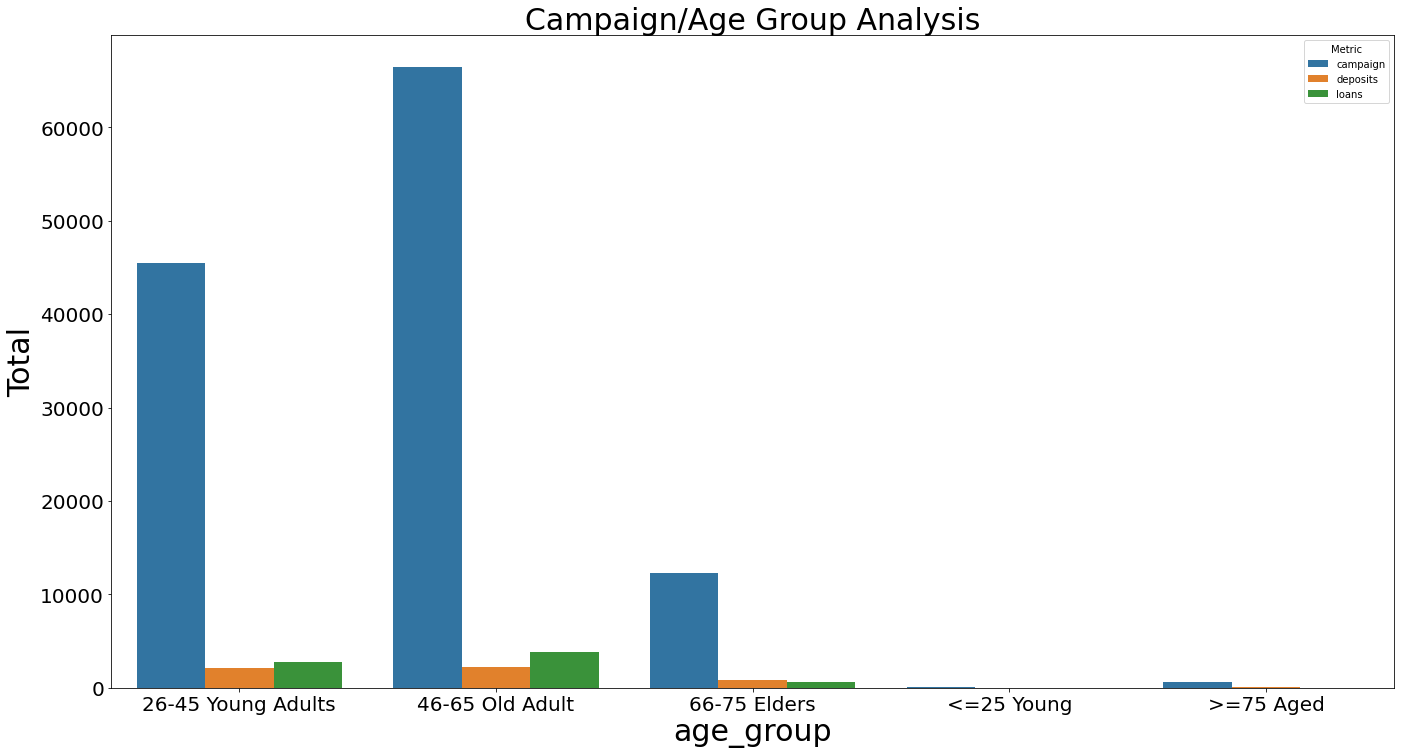

In [63]:
camp = df.groupby("age_group")[["campaign","deposits", "loans"]].sum().reset_index()
camp

#Lets visualise-In order to do this, we transpose age_group, campaign, deposits and loans columns into a single column (metriec)
camp1 = pd.melt(camp, id_vars="age_group", var_name="Metric", value_name="Total")
camp1

#Lets visualise-In order to do this
plt.figure(figsize=(23,12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('age_group', fontsize=30)
plt.ylabel('Total',  fontsize=30)
plt.title('Campaign/Age Group Analysis', fontsize=30)
camp1 = pd.melt(camp, id_vars="age_group", var_name="Metric", value_name="Total")
sns.barplot(x="age_group", y="Total", data=camp1, hue="Metric")

plt.show();

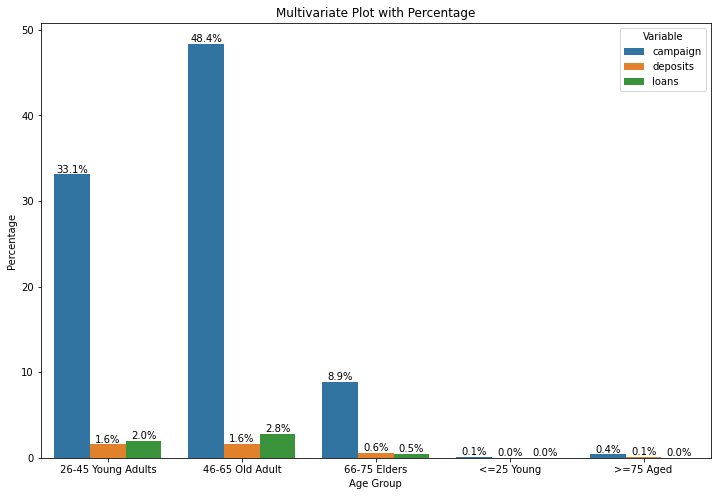

In [64]:
# Group the data by "age_group" and calculate the sum of "campaign", "deposits", and "loans"
camp = df.groupby("age_group")[["campaign", "deposits", "loans"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = camp[["campaign", "deposits", "loans"]].sum().sum()

# Calculate the percentage for each variable
camp_percentage = camp[["campaign", "deposits", "loans"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
camp_with_percentage = pd.concat([camp["age_group"], camp_percentage], axis=1)

# Melt the data to long format for plotting
camp_melted = pd.melt(camp_with_percentage, id_vars="age_group", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="age_group", y="Percentage", hue="Variable", data=camp_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Multivariate Plot with Percentage")
plt.show()


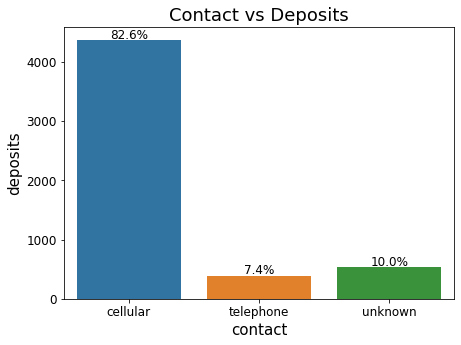

In [65]:
plt.figure(figsize=(7,5))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('contact', fontsize = 15)
plt.ylabel('deposits',  fontsize = 15)
plt.title('Contact vs Deposits', fontsize = 18)
cont_dep = df.groupby("contact")["deposits"].sum().reset_index()
ax=sns.barplot(x="contact", data=cont_dep, y='deposits')

# Percentage of quantity ordered 
contact_percentage = cont_dep["deposits"] / cont_dep["deposits"].sum() * 100

# Add quantity ordered percentage line
for i, p in enumerate(ax.patches):
    ax.annotate(f'{contact_percentage[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show();

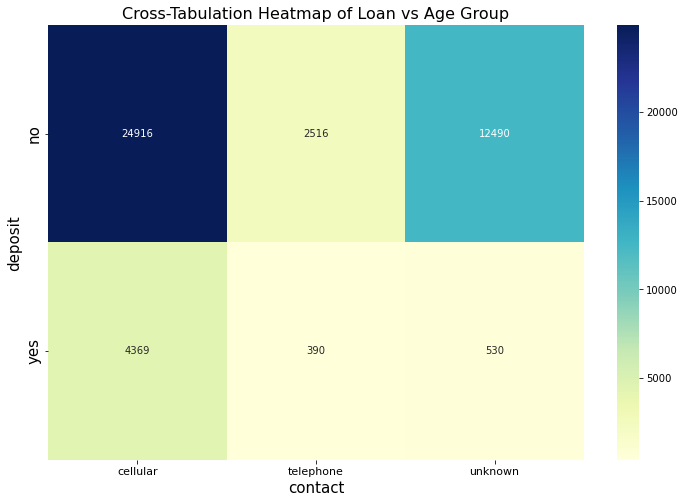

In [66]:
#To understand the relationship between age groups and defaulters
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['deposit'], df['contact'])

# Create a heatmap using seaborn
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.xlabel('contact', fontsize=15)
plt.ylabel('deposit', fontsize=15)
plt.title('Cross-Tabulation Heatmap of Loan vs Age Group', fontsize=16)

# Display the plot
plt.show()

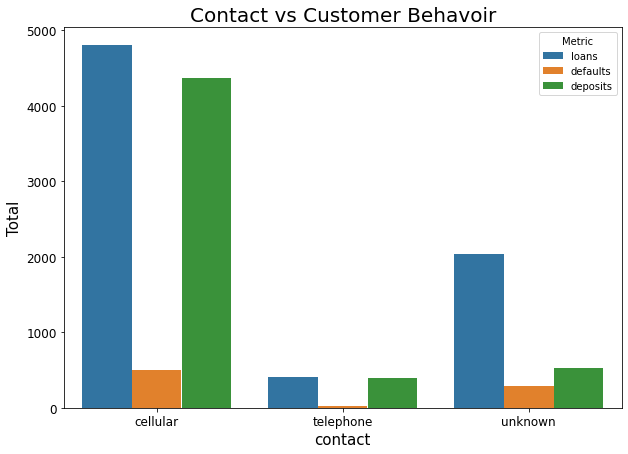

In [67]:
cont = df.groupby("contact")[["loans","defaults", "deposits"]].sum().reset_index()
cont

#Lets visualise-In order to do this, we transpose Qty Ordered, revenue and Unit_Price columns into a single column (metriec)
cont1 = pd.melt(cont, id_vars="contact", var_name="Metric", value_name="Total")
cont1

#Lets visualise-In order to do this
plt.figure(figsize=(10,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('contact', fontsize=15)
plt.ylabel('Total',  fontsize=15)
plt.title('Contact vs Customer Behavoir', fontsize=20)
cont1 = pd.melt(cont, id_vars="contact", var_name="Metric", value_name="Total")
sns.barplot(x="contact", y="Total", data=cont1, hue="Metric")

plt.show();


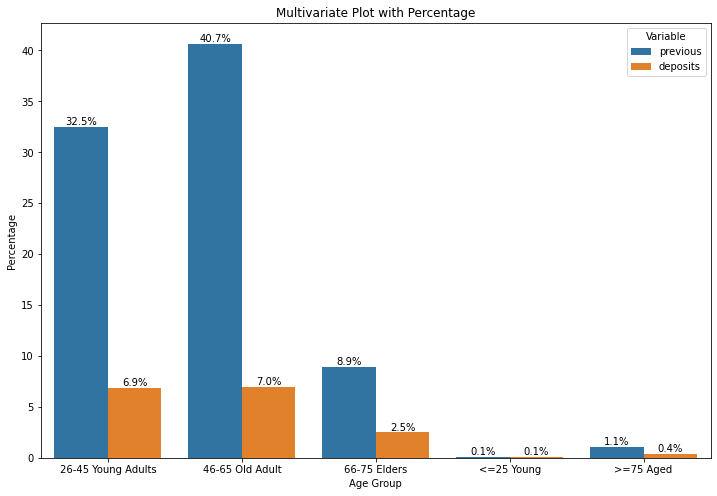

In [68]:
# Group the data by "age_group" and calculate the sum of "previous" and "deposits"
age_cont = df.groupby("age_group")[["previous", "deposits"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = age_cont[["previous", "deposits"]].sum().sum()

# Calculate the percentage for each variable
age_cont_percentage = age_cont[["previous", "deposits"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
age_cont_with_percentage = pd.concat([age_cont["age_group"], age_cont_percentage], axis=1)

# Melt the data to long format for plotting
age_cont_melted = pd.melt(age_cont_with_percentage, id_vars="age_group", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="age_group", y="Percentage", hue="Variable", data=age_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Multivariate Plot with Percentage")
plt.show()


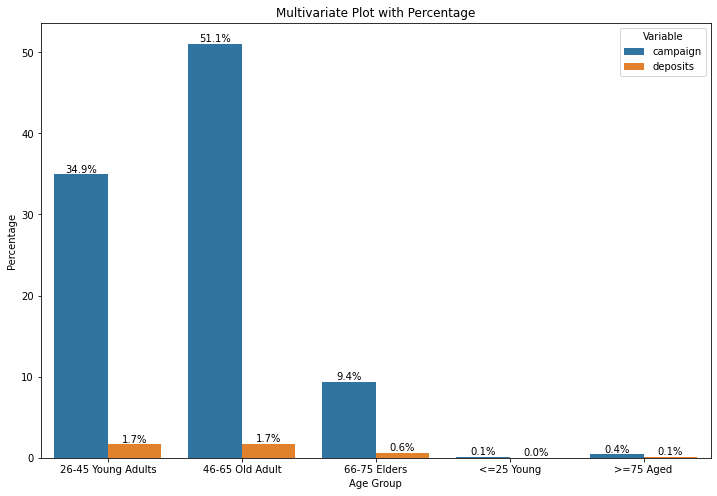

In [69]:
# Group the data by "age_group" and calculate the sum of "previous" and "deposits"
age_cont = df.groupby("age_group")[["campaign", "deposits"]].sum().reset_index()

total_count = age_cont[["campaign", "deposits"]].sum().sum()

age_cont_percentage = age_cont[["campaign", "deposits"]].div(total_count).mul(100)

age_cont_with_percentage = pd.concat([age_cont["age_group"], age_cont_percentage], axis=1)

age_cont_melted = pd.melt(age_cont_with_percentage, id_vars="age_group", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="age_group", y="Percentage", hue="Variable", data=age_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Multivariate Plot with Percentage")

plt.show()

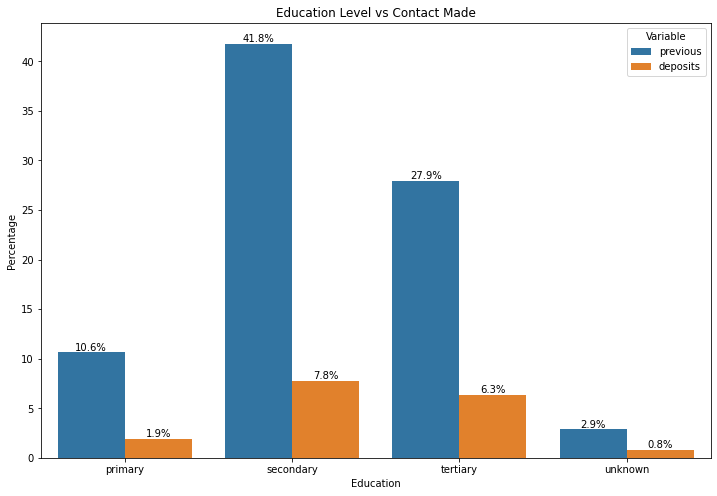

In [70]:
# Group the data by "education" and calculate the sum of "previous" and "deposits"
edu_cont = df.groupby("education")[["previous", "deposits"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = edu_cont[["previous", "deposits"]].sum().sum()

# Calculate the percentage for each variable
edu_cont_percentage = edu_cont[["previous", "deposits"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
edu_cont_with_percentage = pd.concat([edu_cont["education"], edu_cont_percentage], axis=1)

# Melt the data to long format for plotting
edu_cont_melted = pd.melt(edu_cont_with_percentage, id_vars="education", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="education", y="Percentage", hue="Variable", data=edu_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Education")
plt.ylabel("Percentage")
plt.title("Education Level vs Contact Made")
plt.show()


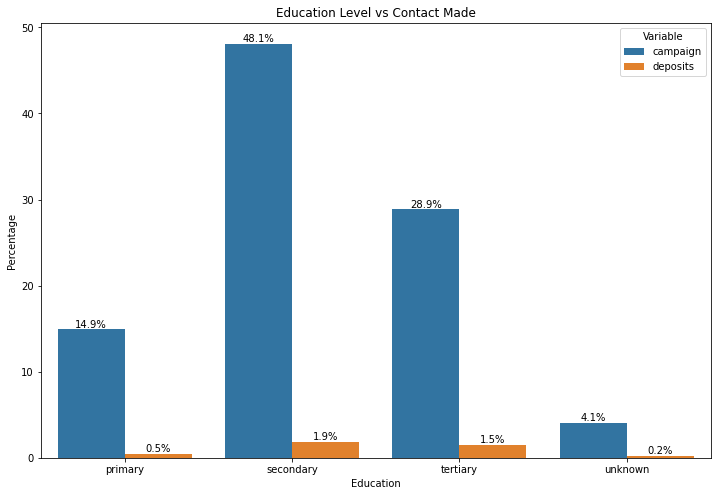

In [71]:
# Group the data by "education" and calculate the sum of "previous" and "deposits"
edu_cont = df.groupby("education")[["campaign", "deposits"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = edu_cont[["campaign", "deposits"]].sum().sum()

# Calculate the percentage for each variable
edu_cont_percentage = edu_cont[["campaign", "deposits"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
edu_cont_with_percentage = pd.concat([edu_cont["education"], edu_cont_percentage], axis=1)

# Melt the data to long format for plotting
edu_cont_melted = pd.melt(edu_cont_with_percentage, id_vars="education", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="education", y="Percentage", hue="Variable", data=edu_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Education")
plt.ylabel("Percentage")
plt.title("Education Level vs Contact Made")
plt.show()


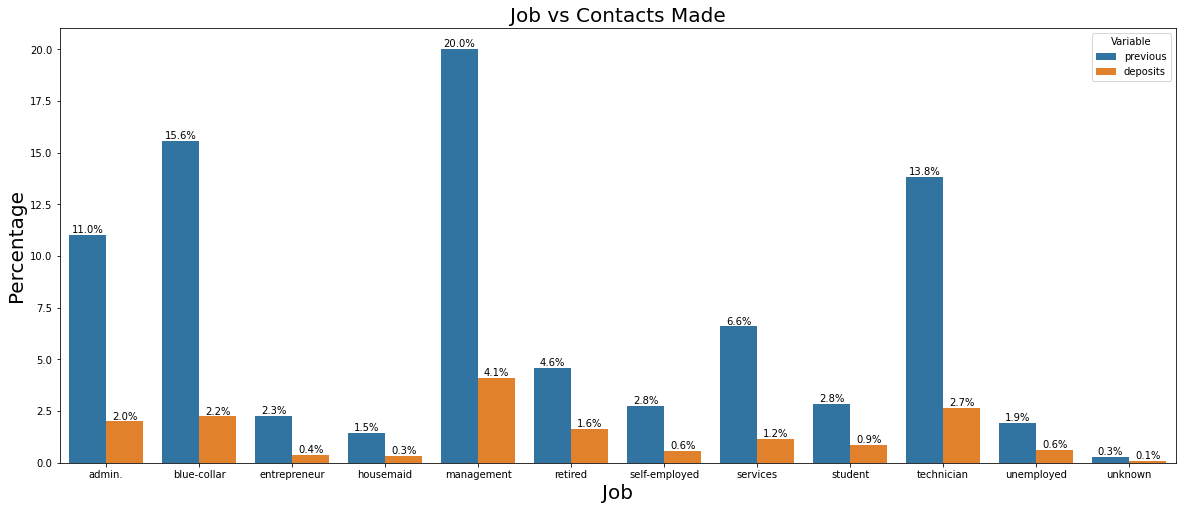

In [72]:
# Group the data by "job" and calculate the sum of "previous" and "deposits"
job_cont = df.groupby("job")[["previous", "deposits"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = job_cont[["previous", "deposits"]].sum().sum()

# Calculate the percentage for each variable
job_cont_percentage = job_cont[["previous", "deposits"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
job_cont_with_percentage = pd.concat([job_cont["job"], job_cont_percentage], axis=1)

# Melt the data to long format for plotting
job_cont_melted = pd.melt(job_cont_with_percentage, id_vars="job", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x="job", y="Percentage", hue="Variable", data=job_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Job",  fontsize=20)
plt.ylabel("Percentage", fontsize=20)
plt.title('Job vs Contacts Made', fontsize=20)
plt.show()


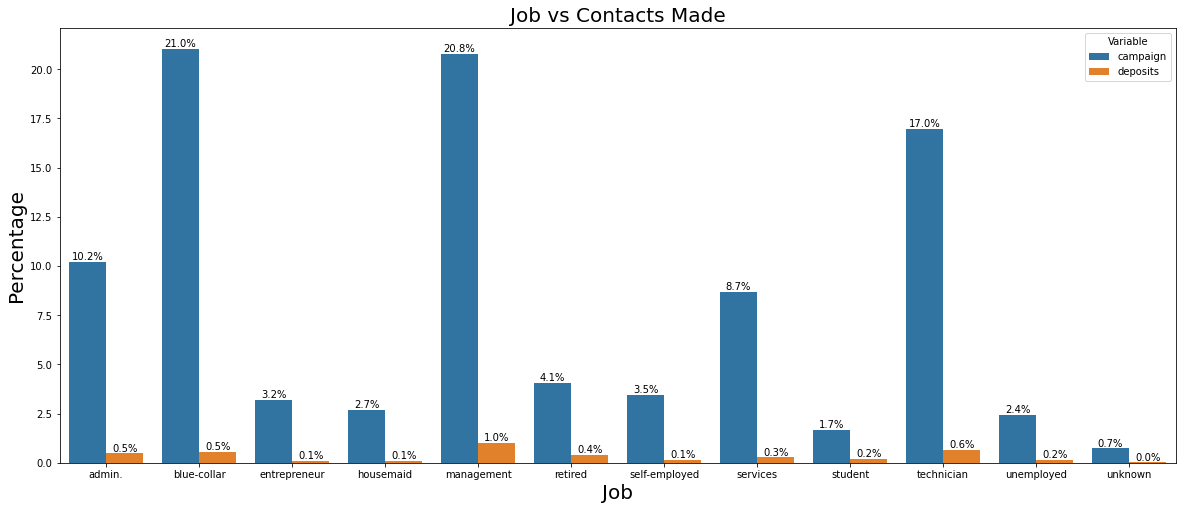

In [73]:
# Group the data by "job" and calculate the sum of "previous" and "deposits"
job_cont = df.groupby("job")[["campaign", "deposits"]].sum().reset_index()

# Calculate the total count for percentage calculation
total_count = job_cont[["campaign", "deposits"]].sum().sum()

# Calculate the percentage for each variable
job_cont_percentage = job_cont[["campaign", "deposits"]].div(total_count).mul(100)

# Combine the original data with the calculated percentage values
job_cont_with_percentage = pd.concat([job_cont["job"], job_cont_percentage], axis=1)

# Melt the data to long format for plotting
job_cont_melted = pd.melt(job_cont_with_percentage, id_vars="job", var_name="Variable", value_name="Percentage")

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x="job", y="Percentage", hue="Variable", data=job_cont_melted)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{y:.1f}%'
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)

plt.xlabel("Job",  fontsize=20)
plt.ylabel("Percentage", fontsize=20)
plt.title('Job vs Contacts Made', fontsize=20)
plt.show()


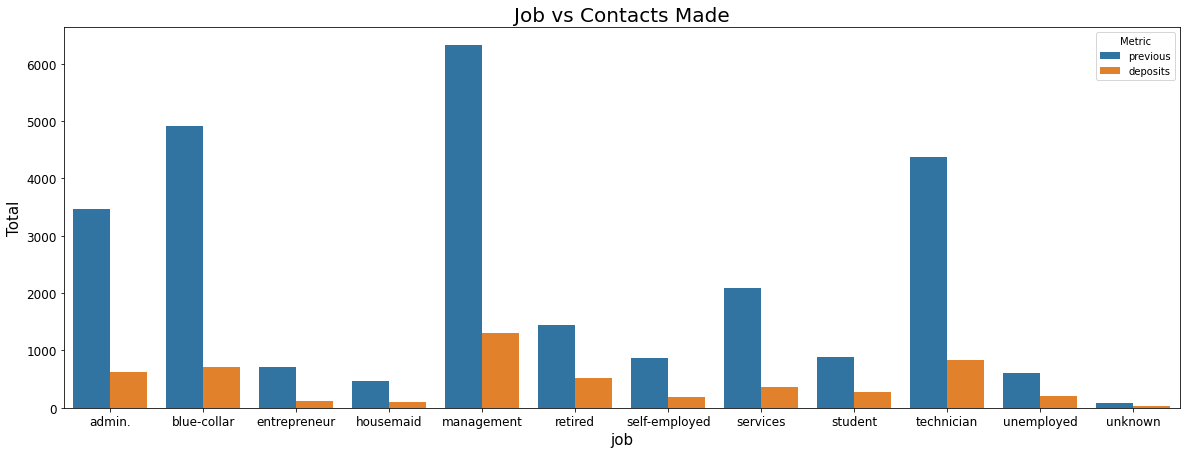

In [74]:
job_cont = df.groupby("job")[["previous", "deposits"]].sum().reset_index()
job_cont

#Lets visualise-In order to do this, we transpose Qty Ordered, revenue and Unit_Price columns into a single column (metriec)
job_cont1 = pd.melt(job_cont, id_vars="job", var_name="Metric", value_name="Total")
job_cont1

#Lets visualise-In order to do this
plt.figure(figsize=(20,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('job', fontsize=15)
plt.ylabel('Total',  fontsize=15)
plt.title('Job vs Contacts Made', fontsize=20)
age_cont1 = pd.melt(job_cont, id_vars="job", var_name="Metric", value_name="Total")
sns.barplot(x="job", y="Total", data=job_cont1, hue="Metric")

plt.show();

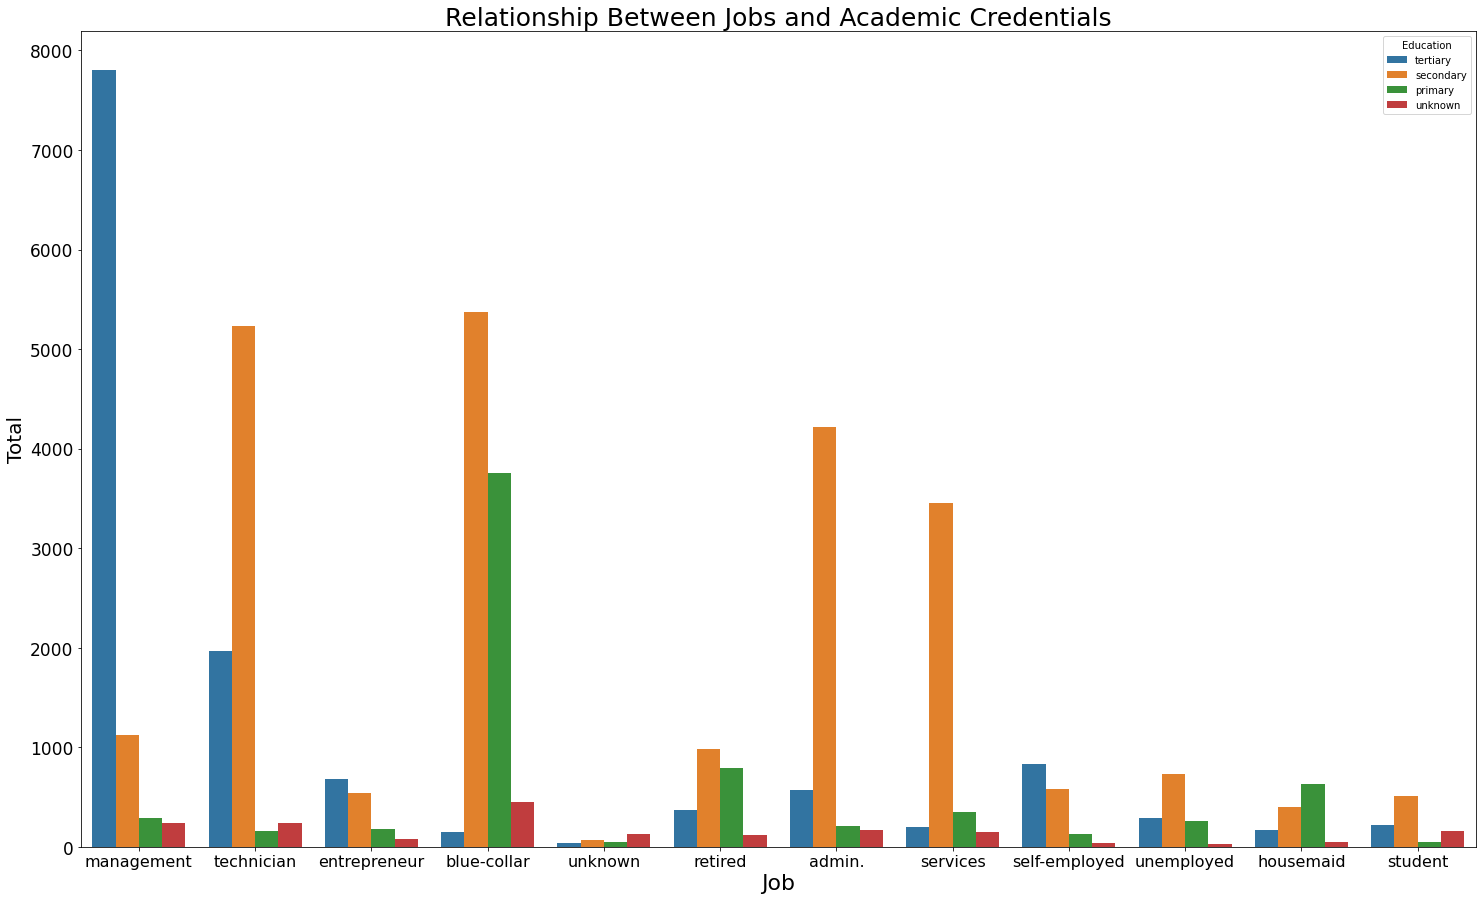

In [75]:
# Create a clustered bar plot
plt.figure(figsize=(25, 15))
sns.countplot(x='job', hue='education', data=df, hue_order=['tertiary', 'secondary', 'primary', 'unknown'])
plt.xlabel('Job', fontsize=22)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=17)
plt.title('Relationship Between Jobs and Academic Credentials', fontsize=25)
plt.legend(title='Education')
plt.show()

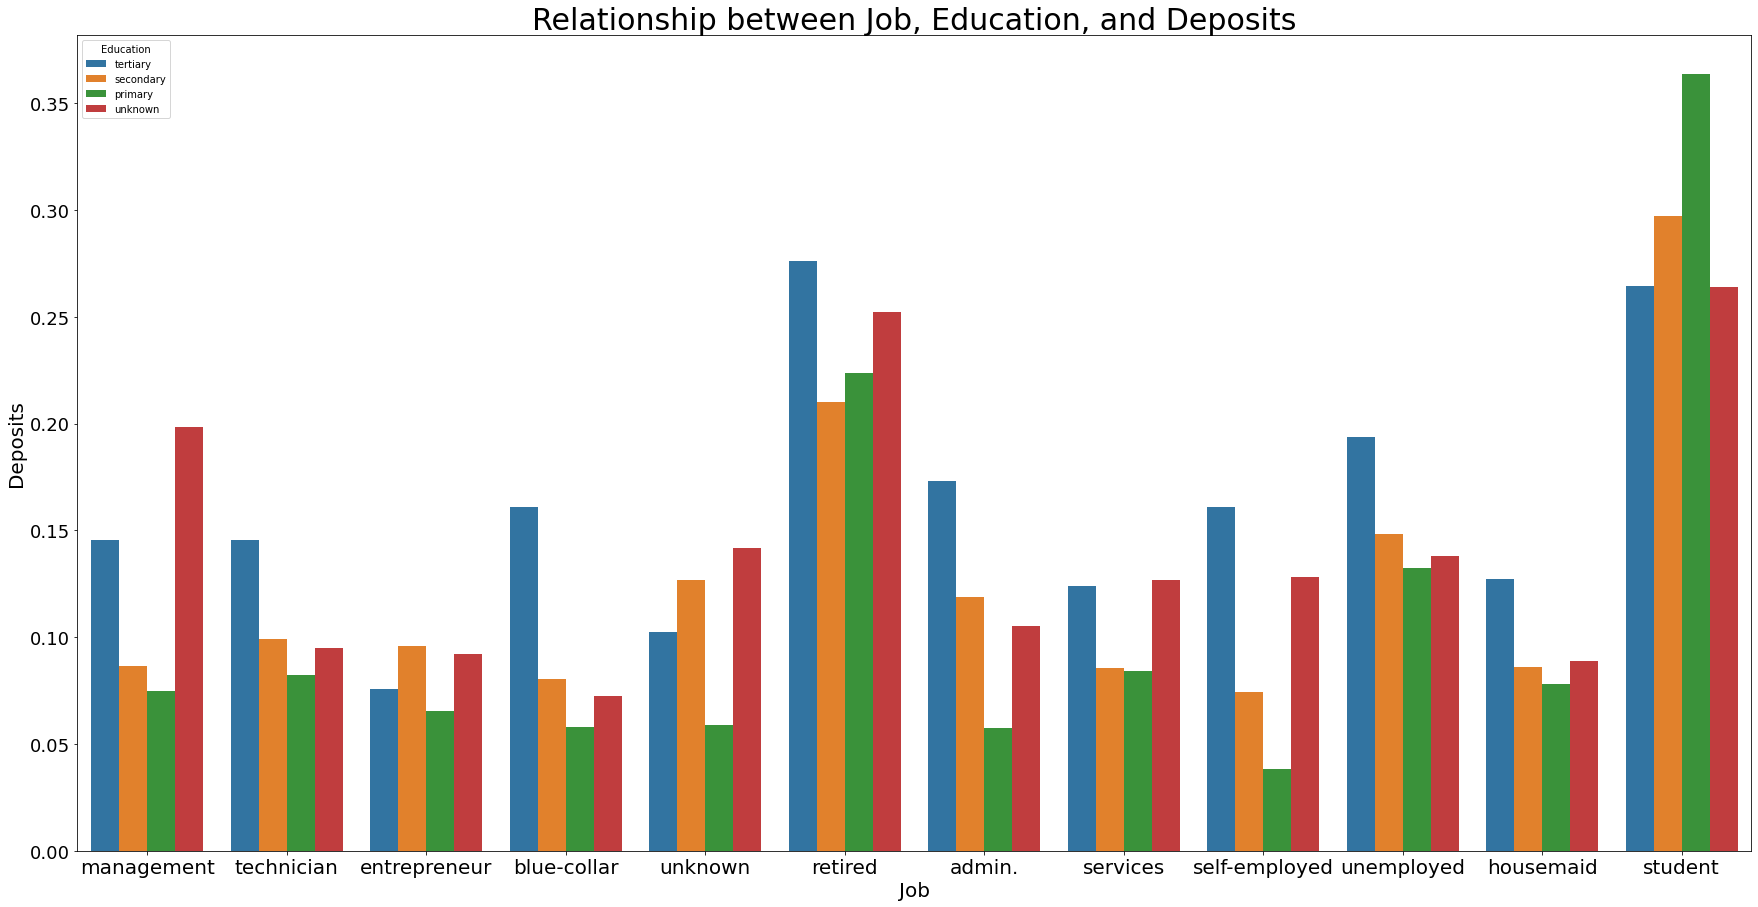

In [76]:
# Create a bivariate clustered bar plot
plt.figure(figsize=(30, 15))
sns.barplot(x='job', y='deposits', hue='education', data=df, 
            hue_order=['tertiary', 'secondary', 'primary', 'unknown'], ci=None)
plt.xlabel('Job', fontsize=20)
plt.ylabel('Deposits', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.title('Relationship between Job, Education, and Deposits', fontsize=30)
plt.legend(title='Education')

plt.show()

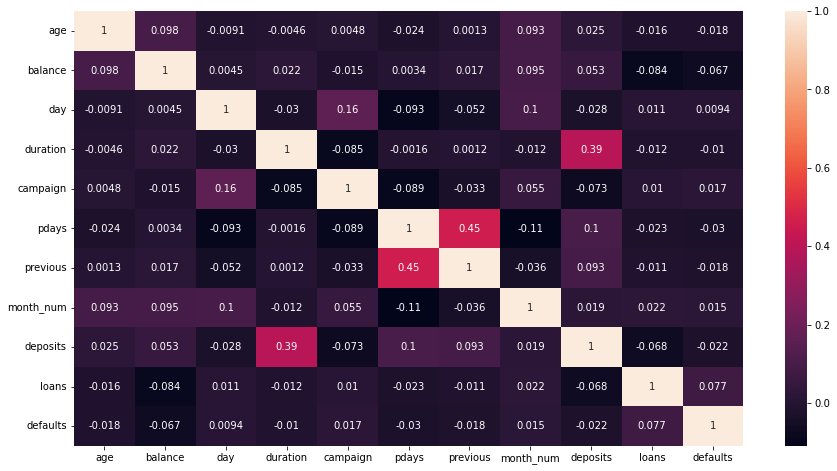

In [77]:
#Correlation Evaluation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

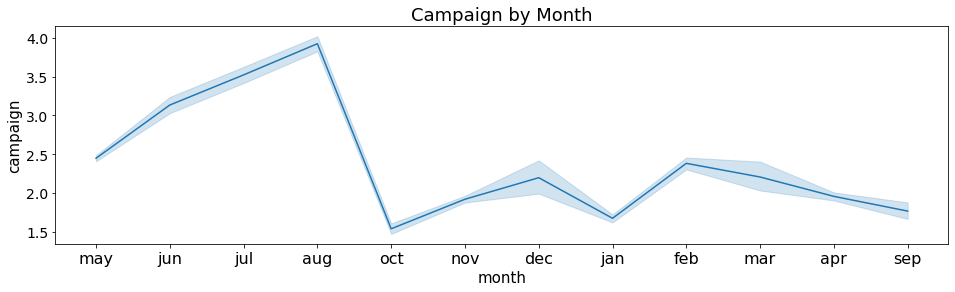

In [78]:
#Compare Revenue and 3 variable to unerstand trends
plt.figure(figsize=(16, 4))

plt.yticks(fontsize=15)
plt.ylabel('campaign', fontsize=15)
plt.xlabel('month',  fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
sns.lineplot(y="campaign", x="month", data=df)
plt.title('Campaign by Month', fontsize=18)

plt.show();

In [79]:
#using pivot table 
df.pivot_table(values="campaign", columns="month", aggfunc="sum")

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
campaign,5733,24534,470,6310,2346,24301,16746,1052,33693,7615,1134,1022


# MACHINE LEARNING

# Future Engineering/Data Preprocessing

In [80]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit', 'age_group']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month_num', 'deposits', 'loans', 'defaults']


In [81]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'month_num', 'age_group', 'deposits',
       'loans', 'defaults'],
      dtype='object')

# Split the data

In [82]:
df.head()

df1 = df[['age', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month_num',
       'deposits', 'balance', 'loans']]

label = df[['defaults']]  

#Choosing the target and predictor variable. It means independent and dependent variable (Test variable)
X = df.drop(['defaults'], axis=1)
y = df['defaults']


# Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split #target varaible (y); (x) test variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(36168, 21)
(9043, 21)
(36168,)
(9043,)


# Encoding Categorical Variables

In [84]:
#Data from training may lick into test set as if test set has seen the training set 
#activities. So encoding before splitting is not good practice

# Next, let us encode our categorical variables using one hot encoding
# Apply pd.get_dummies on training and test data


X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit', 'age_group'])
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit', 'age_group'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0) #making sure gtraining and testing have same number of columns


# Feature Scaling

In [85]:
# Robust Scaler is preferred here as it is more robust to outliers. Future scaling is important because it prevents confusion of our 
#model. Difference in scale is sensitive to gradient algorithm but not to linear regression, randon forest and decision tree. Future scalling is to have all of them have the same scales.

#Normalisation (0-1) 
#Standardisation 
#Mkin-max = x-xmin/xmax-xmin x=specific age you are working with
#this method is not good with outliers

#Standarsatiom = x-u/sd......starndardisation makes mean zero (0) and your data have sd of 1. 
#Robust scaler is not sensitive to outliers. It eliminate the impact of outliers RC=x-median of sd/IQR (median is not susistible to outliers)

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Scaling

In [86]:
#Normalise the data
scaler = MinMaxScaler()

df1["Scaled_loa"] = scaler.fit_transform(df1['loans'].values.reshape(-1, 1))
df1["Scaled_pd"] = scaler.fit_transform(df1[['pdays']].values.reshape(-1, 1))
df1["Scaled_depo"] = scaler.fit_transform(df1[['deposits']].values.reshape(-1, 1))
df1["Scaled_prev"] = scaler.fit_transform(df1[['previous']].values.reshape(-1, 1))
df1["Scaled_camp"] = scaler.fit_transform(df1[['campaign']].values.reshape(-1, 1))
df1["Scaled_bal"] = scaler.fit_transform(df1[['balance']].values.reshape(-1, 1))
df1["Scaled_ag"] = scaler.fit_transform(df1[['age']].values.reshape(-1, 1))
df1["Scaled_dy"] = scaler.fit_transform(df1[['day']].values.reshape(-1, 1))
df1["Scaled_dur"] = scaler.fit_transform(df1[['duration']].values.reshape(-1, 1))
df1["Scaled_month_numb"] = scaler.fit_transform(df1[['month_num']].values.reshape(-1, 1))

#Drop the unscaled colums that have been scaled
df1.drop(['loans', 'pdays', 'deposits', 'previous', 'campaign', 'balance', 'age', 'day', 'duration', 'month_num'], axis=1, inplace=True)

df1.head(3)

,Scaled_loa,Scaled_pd,Scaled_depo,Scaled_prev,Scaled_camp,Scaled_bal,Scaled_ag,Scaled_dy,Scaled_dur,Scaled_month_numb
0,0.0,0.0,0.0,0.0,0.0,0.092259,0.519481,0.133333,0.053070,0.363636
1,0.0,0.0,0.0,0.0,0.0,0.073067,0.337662,0.133333,0.030704,0.363636
2,1.0,0.0,0.0,0.0,0.0,0.072822,0.194805,0.133333,0.015453,0.363636


In [87]:
display(X_train.head(1))
display(X_test.head(1))

,age,balance,day,duration,campaign,pdays,previous,month_num,deposits,loans,...,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,age_group_26-45 Young Adults,age_group_46-65 Old Adult,age_group_66-75 Elders,age_group_<=25 Young,age_group_>=75 Aged
3344,0.133333,0.295806,-0.076923,-0.502326,-0.5,0.0,0.0,-0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,age,balance,day,duration,campaign,pdays,previous,month_num,deposits,loans,...,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,age_group_26-45 Young Adults,age_group_46-65 Old Adult,age_group_66-75 Elders,age_group_<=25 Young,age_group_>=75 Aged
3776,0.066667,0.094276,0.0,0.046083,-0.5,0.0,0.0,-0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
print(X_train.shape)
print(X_test.shape)

(36168, 61)
(9043, 61)


# Training the Data

In [152]:
X_train.head(3)

,age,balance,day,duration,campaign,pdays,previous,month_num,deposits,loans,...,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,age_group_26-45 Young Adults,age_group_46-65 Old Adult,age_group_66-75 Elders,age_group_<=25 Young,age_group_>=75 Aged
3344,0.133333,0.295806,-0.076923,-0.502326,-0.5,0.0,0.0,-0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17965,0.666667,0.712288,1.076923,0.413953,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18299,0.200000,2.498160,1.153846,-0.232558,1.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
ly_pred = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


In [91]:
y_train.head(3)

3344     0
17965    0
18299    0
Name: defaults, dtype: int64

In [92]:
ly_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
y_test.head(3)

3776     0
9928     0
33409    0
Name: defaults, dtype: int64

In [94]:
#Model building
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


In [96]:
from sklearn.naive_bayes import GaussianNB

classifiers = [
    [DecisionTreeClassifier(), "Decision Tree"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SVC(), "Support Vector Machine"],
    [LogisticRegression(), "Logistic Regression"],
    [RandomForestClassifier(), "Random Forest"],
    [GaussianNB(), "Naive Bayes"],
    [GradientBoostingClassifier(),'Gradient Boosting Machine'],   
    [SGDClassifier(), 'SGD Classifier']
    ]

In [97]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [98]:
acc_list

{'Decision Tree': ['100.0%'],
 'K-Nearest Neighbors': ['98.74%'],
 'Support Vector Machine': ['98.47%'],
 'Logistic Regression': ['100.0%'],
 'Random Forest': ['100.0%'],
 'Naive Bayes': ['100.0%'],
 'Gradient Boosting Machine': ['100.0%'],
 'SGD Classifier': ['99.86%']}

In [99]:
print('Accuracy_Score')
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,SGD Classifier
0,100.0%,98.74%,98.47%,100.0%,100.0%,100.0%,100.0%,99.86%


In [100]:
print('Precision_Score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,SGD Classifier
0,100.0%,100.0%,0.0%,100.0%,100.0%,100.0%,100.0%,100.0%


In [101]:
print('Recall_Score')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,SGD Classifier
0,100.0%,17.39%,0.0%,100.0%,100.0%,100.0%,100.0%,90.58%


In [102]:
print('roc_Score')
s4 = pd.DataFrame(roc_list)
s4.head()

roc_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,SGD Classifier
0,100.0%,58.7%,50.0%,100.0%,100.0%,100.0%,100.0%,95.29%


In [103]:
#Model building
#Random Forest Classifier
kfc = KNeighborsClassifier()
kfc.fit(X_train, y_train)
kfy_pred = kfc.predict(X_test)

print("KNeighborsClassifier")
print("Accuracy:", accuracy_score(y_test, kfy_pred))
print("Precision:", precision_score(y_test, kfy_pred))
print("Recall:", recall_score(y_test, kfy_pred))
print("F1-score:", f1_score(y_test, kfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, kfy_pred))

KNeighborsClassifier
Accuracy: 0.987393564082716
Precision: 1.0
Recall: 0.17391304347826086
F1-score: 0.29629629629629634
AUC-ROC: 0.5869565217391304


In [104]:
#Model building
#Random Forest Classifier
sfc = SGDClassifier()
sfc.fit(X_train, y_train)
sfc_pred = sfc.predict(X_test)

print("SGDClassifier")
print("Accuracy:", accuracy_score(y_test, sfc_pred))
print("Precision:", precision_score(y_test, sfc_pred))
print("Recall:", recall_score(y_test, sfc_pred))
print("F1-score:", f1_score(y_test, sfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, sfc_pred))

SGDClassifier
Accuracy: 0.9982306756607321
Precision: 1.0
Recall: 0.8840579710144928
F1-score: 0.9384615384615386
AUC-ROC: 0.9420289855072463


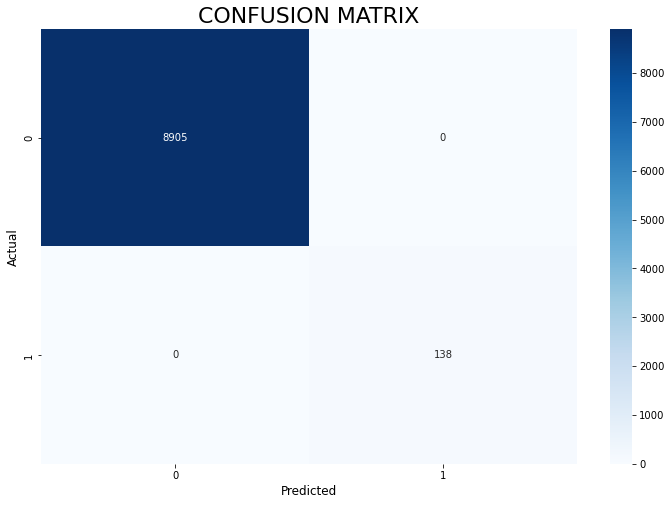

In [105]:
#Create a confusion metrix. lcm- logistic confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(lcm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

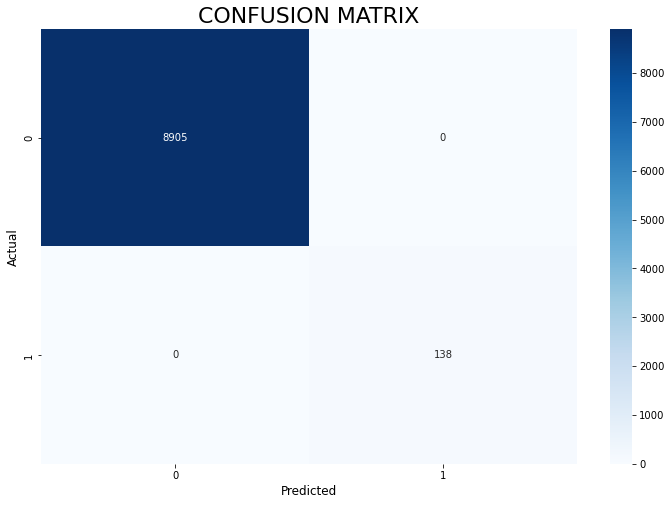

In [106]:
#Create a confusion metrix. 
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(rcm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

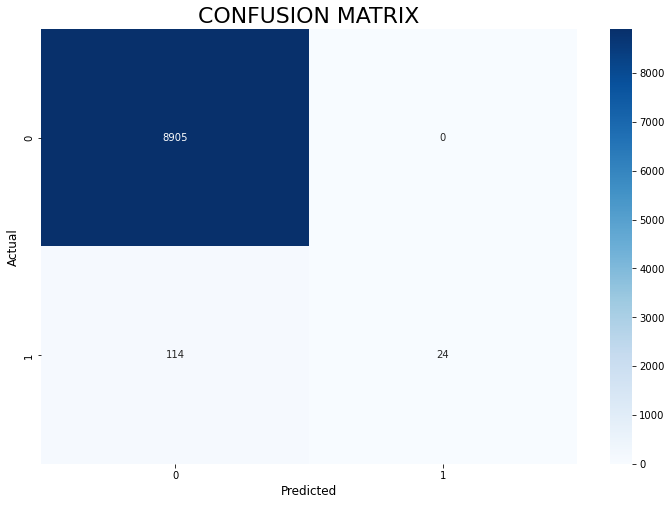

In [107]:
#Create a confusion metrix. 
kfy = confusion_matrix(y_test, kfy_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(kfy, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

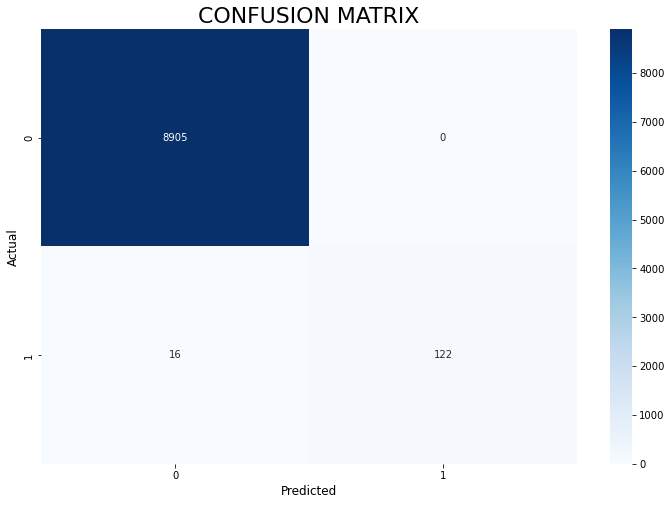

In [108]:
#Create a confusion metrix. 
sfc = confusion_matrix(y_test, sfc_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(sfc, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

# Unsupervised Machine Learning

In [116]:
from sklearn.preprocessing import LabelEncoder #Transforms categorical data to numerical data

#Label Encoding
encoder = LabelEncoder() #Method initialisation

#Looping for columns except surpervised
for c in df.columns[1:]:
    if(df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]
        
df.head(2)   

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,month_num,age_group,deposits,loans,defaults
0,58,4,1,2,2143,1,2,5,8,261,1,-1,0,3,5,2,0,0,0
1,44,9,2,1,29,1,2,5,8,151,1,-1,0,3,5,1,0,0,0


In [118]:
df.drop(['month'], axis=1, inplace=True)
df.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,pdays,previous,poutcome,month_num,age_group,deposits,loans,defaults
0,58,4,1,2,2143,1,2,5,261,1,-1,0,3,5,2,0,0,0
1,44,9,2,1,29,1,2,5,151,1,-1,0,3,5,1,0,0,0
2,33,2,1,1,2,1,2,5,76,1,-1,0,3,5,0,0,1,0
3,47,1,1,3,1506,1,2,5,92,1,-1,0,3,5,1,0,0,0
4,33,11,2,3,1,0,2,5,198,1,-1,0,3,5,0,0,0,0


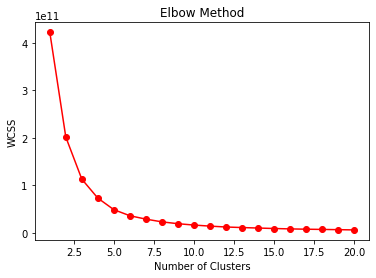

In [119]:
#Determine optimum number of clusters
wcss = []# 3.Append to score
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)# 1.put in i
    kmeans.fit(df)# 2.Apply to data
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
#Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)
    
#Add cluster labels to data
df['cluster'] = kmeans.labels_

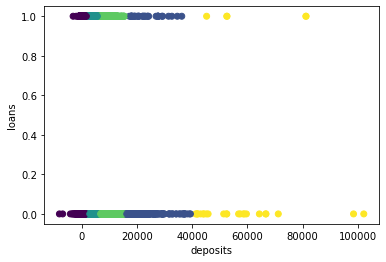

0.6869978205367299

In [132]:
#Visualize cluster result
plt.scatter(df['balance'], df['deposits'], c=df['cluster'], label='centroids')
plt.xlabel('deposits')
plt.ylabel('loans')
plt.show()
            
#Calculate silhouette score
from sklearn.metrics import silhouette_score #Used in evaluation metrics for clustering algorithm
            
silhouette_score(df, kmeans.labels_)

In [134]:
# Extract the columns with 1 and 0 values
selected_columns = df[['loans', 'defaults', 'deposits', 'previous', 'campaign']]

# Perform K-means clustering with 5 clusters
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_columns)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Print the number of samples in each cluster
print(df['Cluster'].value_counts())

plt.show()

3    36086
1     5190
0     3228
2      706
4        1
Name: Cluster, dtype: int64


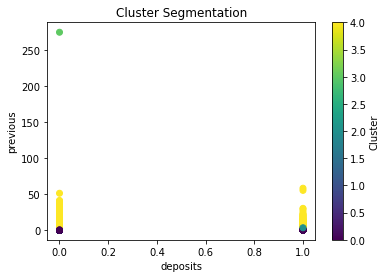

In [138]:
# Extract the columns with 1 and 0 values
selected_columns = df[['loans', 'defaults', 'deposits', 'previous', 'campaign']]

# Perform K-means clustering with 5 clusters
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_columns)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Plot the scatter plot with colored clusters
plt.scatter(df['deposits'], df['previous'], c=df['Cluster'], cmap='viridis')
plt.xlabel('deposits')
plt.ylabel('previous')
plt.title('Cluster Segmentation')
plt.colorbar(label='Cluster')
plt.show()


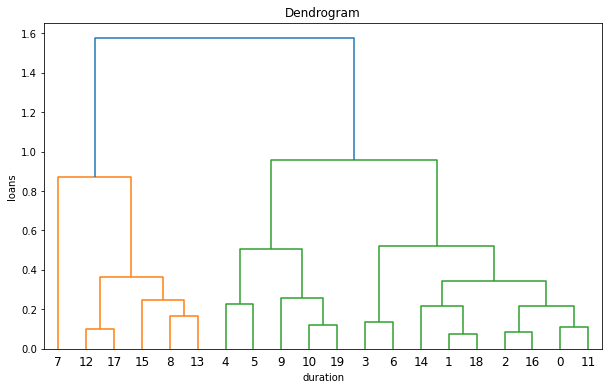

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage
'pip install scipy'
# Generate random data
np.random.seed(0)
X = np.random.rand(20, 2)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('duration')
plt.ylabel('loans')
plt.title('Dendrogram')
plt.show()


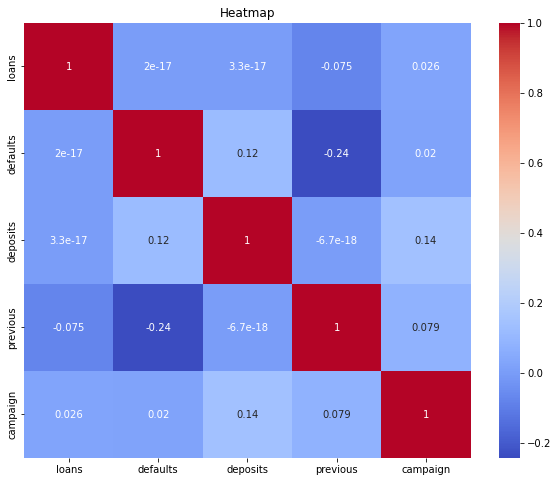

In [149]:
# Create a sample DataFrame with columns containing 0 and 1
df = pd.DataFrame({'loans': np.random.randint(0, 2, size=100),
                     'defaults': np.random.randint(0, 2, size=100),
                     'deposits': np.random.randint(0, 2, size=100),
                     'previous': np.random.randint(0, 2, size=100),
                     'campaign': np.random.randint(0, 2, size=100)})

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()


In [110]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pandas_profiling import ProfileReport